# FINM 33150: Quantitative Trading Strategies - Winter 2023
# Quantitative Trading Project: Tail Risk Protection Strategies - A Pairs Approach

# Preface

## Documentation

Files required to run this Jupyter Notebook:
- tradeSetup.py
- Trading_Strategy.py
- Analysis.py


Disclaimers:
- A WRDS account is required as we access options data from WRDS
- In the event that Plotly is not working, we have attached screenshots in the notebook

## Imports

In [1]:
import tradeSetup
import Trading_Strategy
import Analysis

from tradeSetup import *
from Trading_Strategy import *
from Analysis import *

Loading library list...
Done


## Introduction
In this project, we are proposing a strategy that uses a combination of momentum/trend-following strategies and correlation based strategies such as high own-asset signal return predictability, low cross-asset signal correlation, and low cross-asset signal-return predictability$^{[1]}$. These are incorporated in the context of long–short pair strategies used as portfolio building blocks. We backtest this strategy with major asset classes as shown below.

<br>
<table>
    <tr>
        <td style="text-align:left">$\textbf{Asset Class}$</td>
        <td style="text-align:left">$\textbf{Sub Asset Class}$</td>
        <td style="text-align:left">$\textbf{ETF Name}$</td>
        <td style="text-align:left">$\textbf{ETF Symbol}$</td>
    </tr>
    <tr>
        <td style="text-align:left">$\text{Equities}$</td>
        <td style="text-align:left">$\text{Large-Cap US Equities}$</td>
        <td style="text-align:left">$\text{SPDR S&P 500 ETF Trust}$</td>
        <td style="text-align:left">$\text{SPY}$</td>
    </tr>
    <tr>
        <td style="text-align:left">$\text{Equities}$</td>
        <td style="text-align:left">$\text{Small-Cap US Equities}$</td>
        <td style="text-align:left">$\text{iShares Russell 2000 ETF}$</td>
        <td style="text-align:left">$\text{IWM}$</td>
    </tr>
    <tr>
        <td style="text-align:left">$\text{Commodities}$</td>
        <td style="text-align:left">$\text{Precious Metals}$</td>
        <td style="text-align:left">$\text{SPDR Gold Shares}$</td>
        <td style="text-align:left">$\text{GLD}$</td>
    </tr>
    <tr>
        <td style="text-align:left">$\text{Equities}$</td>
        <td style="text-align:left">$\text{Energy}$</td>
        <td style="text-align:left">$\text{Energy Select Sector SPDR Fund}$</td>
        <td style="text-align:left">$\text{XLE}$</td>
    </tr>
    <tr>
        <td style="text-align:left">$\text{Equities}$</td>
        <td style="text-align:left">$\text{Financials}$</td>
        <td style="text-align:left">$\text{iShares U.S. Financials ETF}$</td>
        <td style="text-align:left">$\text{IYF}$</td>
    </tr>
    <tr>
        <td style="text-align:left">$\text{Real Estate}$</td>
        <td style="text-align:left">$\text{Real Estate Investment Trusts (REITs)}$</td>
        <td style="text-align:left">$\text{iShares U.S. Real Estate ETF}$</td>
        <td style="text-align:left">$\text{IYR}$</td>
    </tr>
    <tr>
        <td style="text-align:left">$\text{Fixed Income}$</td>
        <td style="text-align:left">$\text{Broad Market}$</td>
        <td style="text-align:left">$\text{iShares Core U.S. Aggregate Bond ETF}$</td>
        <td style="text-align:left">$\text{AGG}$</td>
    </tr>
    <tr>
        <td style="text-align:left">$\text{Fixed Income}$</td>
        <td style="text-align:left">$\text{US Treasuries}$</td>
        <td style="text-align:left">$\text{iShares 20+ Year Treasury Bond ETF}$</td>
        <td style="text-align:left">$\text{TLT}$</td>
    </tr>
    <tr>
        <td style="text-align:left">$\text{Equities}$</td>
        <td style="text-align:left">$\text{Healthcare}$</td>
        <td style="text-align:left">$\text{Health Care Select Sector SPDR Fund}$</td>
        <td style="text-align:left">$\text{XLV}$</td>
    </tr>
    <tr>
        <td style="text-align:left">$\text{Fixed Income}$</td>
        <td style="text-align:left">$\text{High-Yield Bonds}$</td>
        <td style="text-align:left">$\text{iShares iBoxx High Yield Corporate Bond ETF}$</td>
        <td style="text-align:left">$\text{HYG}$</td>
    </tr>
    <tr>
        <td style="text-align:left">$\text{Equities}$</td>
        <td style="text-align:left">$\text{Emerging Markets}$</td>
        <td style="text-align:left">$\text{iShares MSCI Emerging Markets ETF}$</td>
        <td style="text-align:left">$\text{EEM}$</td>
    </tr>
    <tr>
        <td style="text-align:left">$\text{Commodities}$</td>
        <td style="text-align:left">$\text{Diversified Commodity Futures}$</td>
        <td style="text-align:left">$\text{iPath Bloomberg Commodity Index Total Return ETN}$</td>
        <td style="text-align:left">$\text{DJP}$</td>
    </tr>

### Long-short Pair Strategy

**Disclaimer: Our method is not to be confused with the popular strategy called “pairs trading.” In contrast, our approach focuses on measuring systematic long-term dependence properties (correlations) of an asset pair, not only between returns, but also among signals and returns.**

The intuition behind the theory is that in order to build a successful long-short pair strategy, we need to take into account the underlying relationships between asset signals and returns. Specifically, three key factors are important for building profitable long-short pair strategies:

1.	**High (positive) own-asset signal-return predictability (correlation)**: This means that assets that have performed well in the past are likely to continue performing well in the future. This is consistent with the idea of momentum investing, where investors buy assets that have recently performed well and sell assets that have recently performed poorly.<br><br>

2.	**Low (or negative) cross-asset signal correlation**: This means that the signals of different assets should not be too strongly correlated with each other. If signals are highly correlated, then it becomes difficult to construct profitable long-short pair strategies because the signals of both the long and short positions will move in the same direction, reducing the profitability of the strategy.<br><br>

3.	**Low (or negative) cross-asset signal-return predictability (correlation)**: This means that the returns of different assets should not be too strongly correlated with each other, given their signals. If returns are highly correlated, then it becomes difficult to construct profitable long-short pair strategies because the long and short positions will tend to move together, reducing the profitability of the strategy.

Taken together, these three factors suggest that a successful long-short pair strategy should be built on assets that have high own-asset signal-return predictability, low cross-asset signal correlation, and low cross-asset signal-return predictability. By focusing on these factors and constructing long-short pairs based on them, the paper argues that investors can build more profitable portfolios compared to conventional rank-based approaches that do not take these factors into account.

### Tail Risk Hedging

Tail risk hedging is a strategy that aims to protect an investment portfolio from extreme downside events, also known as tail risk events. Put and call options are commonly used in tail risk hedging strategies to provide protection against these events.

In the context of the long-short pair strategy proposed in this project, tail risk hedging using put and call options can be used to protect against extreme downside events that may affect the performance of the strategy. The basic idea behind this strategy is to purchase put options on the most heavily weighted long position in the portfolio and call options on the most heavily weighted short positions in the portfolio.

1.	Purchase put options on the long positions: Put options give the holder the right to sell an asset at a predetermined price (the strike price) within a specified time period. By purchasing put options on the most heavily weighted long position in the portfolio, investors can protect against losses if the prices of those assets decline below the strike price. This helps to limit the downside risk of the portfolio. <br> <br> 
2.	Purchase call options on the short positions: Call options give the holder the right to buy an asset at a predetermined price (the strike price) within a specified time period. By purchasing call options on the most heavily weighted short positions in the portfolio, investors can protect against losses if the prices of those assets rise above the strike price. This helps to limit the upside risk of the portfolio.

Over the course of this project, we have tested different combinations of tail risk hedging strategies and optimized each of them to see which performs the best.

## Algorithm

$$ \textbf{ 1. Generate a momentum based signal:} $$ <br>
Resample the adjacent close of the different assets monthly. Construct momentum with rolling average every 12 months and normalize the momentum to obtain signal using the below formula. $$ normalized\ x= (x- \mu)/ \delta $$
$$ \mu = mean\ and \ \delta = standard \ deviation$$

$$ \textbf {2. Create a composite score for different asset pairs:}$$ <br>
$$ \text{B11 is defined as the correlation of asset 1's returns with asset 1's rolling momentum signal}$$
$$ \text{B22 is defined as the correlation of asset 2's returns with asset 2's rolling momentum signal}$$
$$ \text{B12 is defined as the correlation of asset 1's returns with asset 2's rolling momentum signal}$$
$$ \text{B21 is defined as the correlation of asset 2's returns with asset 1's rolling momentum signal}$$
$$ \text{Rho12 is defined as the correlation of asset 1's momentum signal and the correlation of asset 2's momentum signal}$$
$$ \text { Theta: composite score given by the below forumula} $$
$$ (B11 - B12 + B22 - B21) \div \sqrt{(1- Rho12)\div (\pi)} $$

$$ \textbf {3. Obtain Daily Positions:} $$ <br>
The asset in the pair with the higher momentum signal is bought and the other asset is sold. Because we expect higher levels of θ to predict higher expected returns, we allow for more weight to be given to the higher-ranked pairs within the top n via a tilting parameter p. This is imperative given we are buying a call and a put option on the pair with the largest weight. <br> <br>
The long weights and short weights are scaled to 0.5 and -0.5, respectively, so that we end up with a zero-cost position.

$$\textbf {4. Capacity Calculation:$^{[3]}$} $$ <br> <br>
$$\text{Capacity} = \frac{\text{Days to trade} \times \text{ADTV}_i \times \text{% ADTV being traded in 1 day}}{\text{Weight}_i}$$
$$ \text{where:}$$
$$ \text{- ${\text{Weight}_i}$ is the current weight of the ith asset}$$
$$ \text{- $\text{ADTV}_i$ is the Average Daily Trading Volume of the ith security}$$
$$ \text{- Days to trade = 1}$$
$$\text{- %ADTV being traded in one day = 10% (assuming we have access to 10% of the shares of each asset in the market)}$$

Once the Capacity has been calculated for each asset we will be longing and shorting, we choose the minimum value as this amount will be investible in all assets chosen (Capacity determines the maximum amount that can be invested in each asset. Thus, we choose the minimum of all the values as this amount will be guaranteed to be available in the market for each asset).

$$\textbf {5. Sourcing of Options:} $$ <br>
At the start of the month, we buy an out-of-the-money put on the most weighted long ETF. Simultaneously, we buy an out-of-the-money call option on the most weighted short ETF. <br>
Reasoning behind sourcing out-of-the-money options: In the case of ETFs we are long on, we will be shorting them at the end of the month so the downside risk that we want to hedge against is the case where the ETF price drops below the price at the start of the month. Similarly, in the case of ETFs we are shorting, we will be buying them back at the end of the month so the downside risk that we want to hedge against is the case where the ETF price rises above the price at the start of the month. <br>
Strike price: The strike price chose for the put option is 2% lower than the ETF price at the start of the month. Similarly, the strike price chosen for the long option is 2% higher than the ETF price at the start of the month.

$$\textbf {5. Costs Incurred:} $$ <br>
Funding Cost: In order to determine the funding costs, we are using the Fama-French risk free rate as the funding rate
Transaction Cost: 1bp of traded notional. We have assumed this amount since all ETFs can be replicated easily, so none of the major trading platforms would charge a fee for this (can be confirmed at https://www.fidelity.com/trading/commissions-margin-rates). In order to be thorough in our analysis, we have still assumed transaction costs to equal 1bp of traded notional.

$$\textbf {6. Exiting Positions:} $$<br>
Over the course of each month, we will be maintaining our positions. However, in the case of our put option, if the price of the most weighted long ETF falls below the chosen strike price, we will exercise the option. Similarly, in the case of our call option, if the price of the most weighted short ETF rises above the chosen strike, we will exercise the option. <br>
At the end of each month, we close out our positions.

$$\textbf {7. Trading Strategy Workflow:} $$

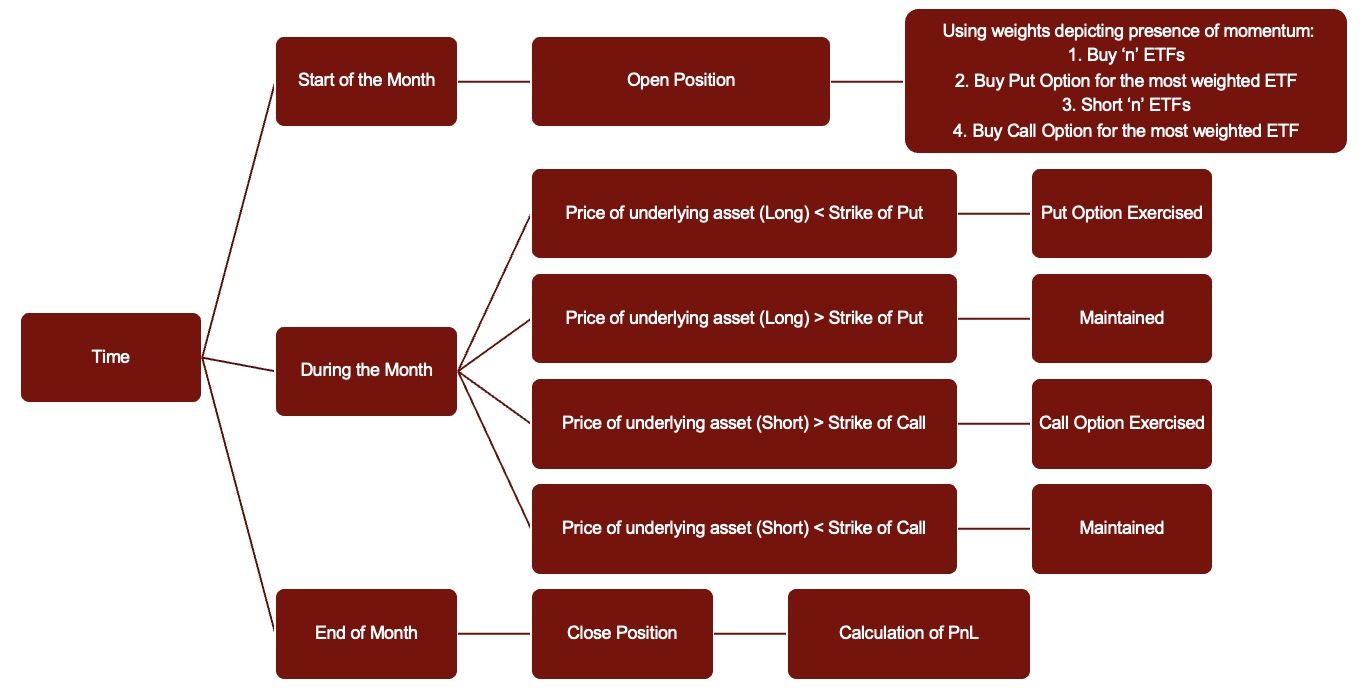

## Motivation

### 1. Presence and Strength of Momentum 

The returns of the ETFs show trends and this could be capitalized on usng momentum strategies. The below graphs show the presence of momentum. 

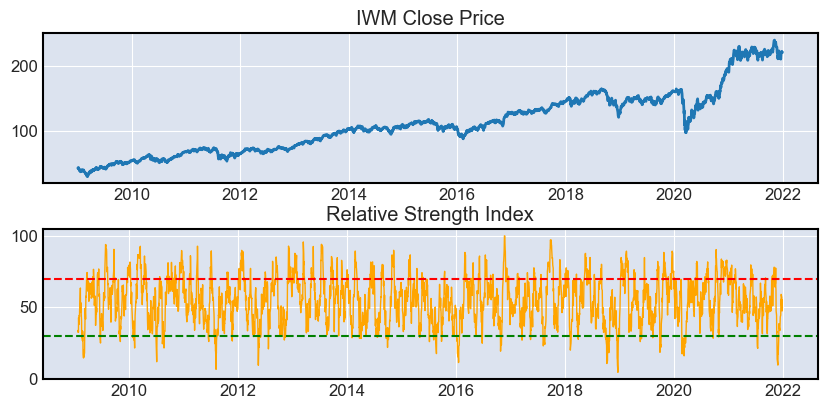

In [3]:
rsi_indicator()

The RSI (Relative Strength Index) indicator shows the presence of momentum in a security's price action by measuring the speed and magnitude of price movements.

The RSI indicator compares the average gain of a security's up periods to the average loss of its down periods over a specific time period. The resulting value is plotted on a scale from 0 to 100.

If the RSI value is above 50, it suggests that the security is experiencing more buying pressure than selling pressure, indicating a bullish momentum. Conversely, if the RSI value is below 50, it suggests that the security is experiencing more selling pressure than buying pressure, indicating a bearish momentum.

Furthermore, if the RSI value moves towards the extremes of the scale, either 0 or 100, it indicates that the security is overbought or oversold, respectively, and a reversal in momentum may be imminent.

Therefore, the RSI indicator can be useful in identifying the presence and strength of momentum in a security's price action, as well as potential turning points in that momentum.

Here, we see from the RSI indicator graph that there is presence and strength of great momentum. 

The above graphs have been done for a sample of IWM but similar strenth of momentum has been found in other samples.

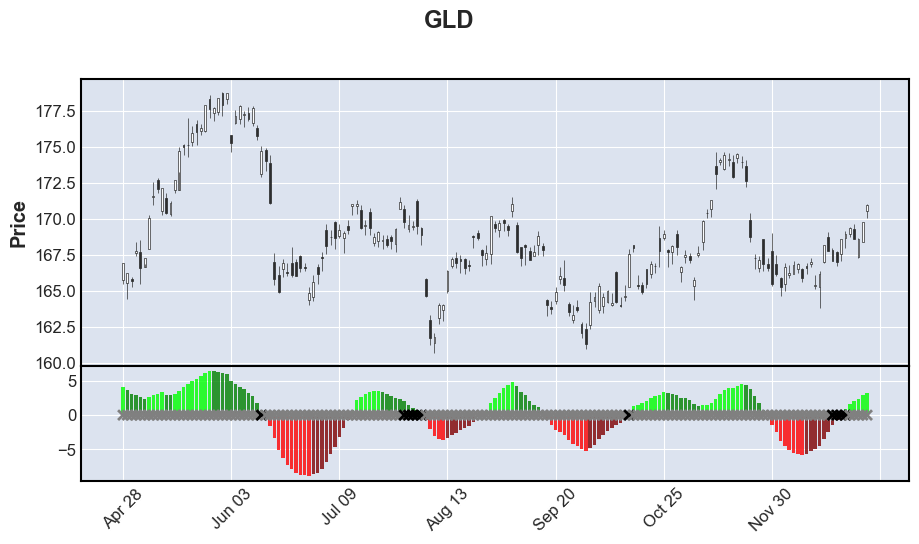

In [2]:
momentum_indicator()

Another indication of the presence of momentum is the squeeze momentum indicator. The bar is light or dark which indicates whether it is gaining or losing momentum, as we can see these colours do not change very frequently, we can use this predictive behaviour in our strategy to make informed decisions.

### 2. Correlation between Assets

The assets show a high correlation in the returns and hence those relations can be capitalized on by using a pariwise strategy. 

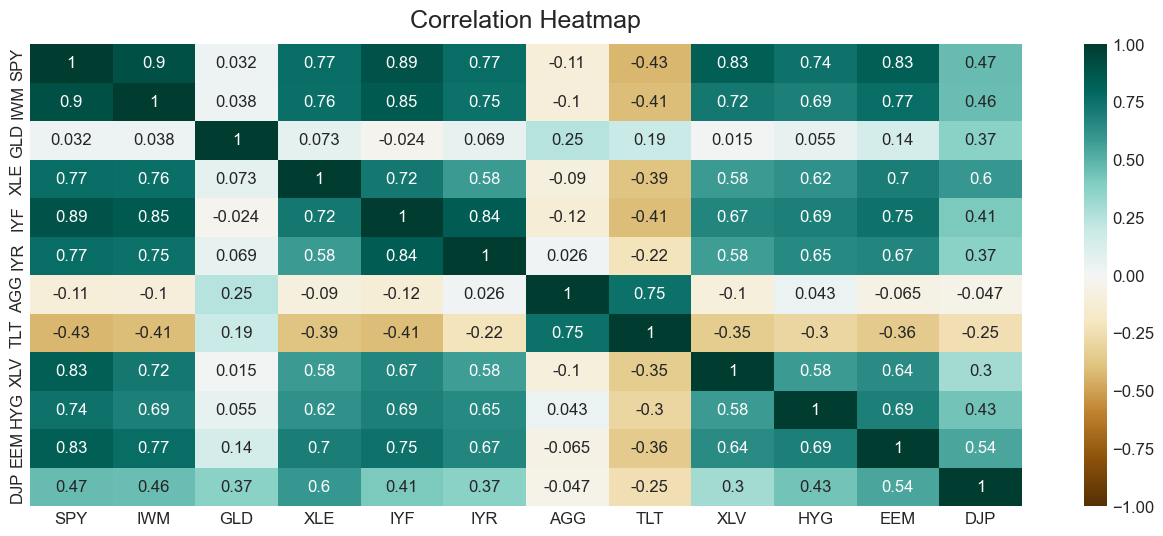

In [4]:
corr_between_assets()

As can be seen here the correleation between some of these assets are vey high for example between IVF and IWM and IWM and SPY. 

When assets have a high correlation, it means that they tend to move in the same direction at the same time.

A pairwise strategy takes advantage of the fact that when two or more assets are highly correlated, their prices tend to move in the same direction, providing an opportunity for traders to profit from the price movements of both assets simultaneously. By trading in two or more correlated assets, traders can reduce their overall risk as the profits from one asset can offset the losses from another asset.

### 3. Risk-Hedging with Options

In [5]:
risk_hedging_with_options()

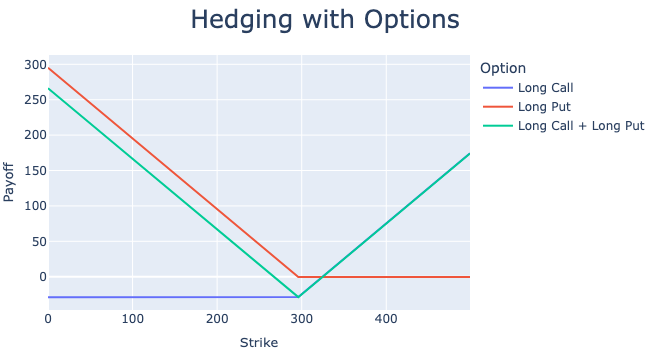

Puts and calls are both options contracts that allow the buyer to either buy or sell an underlying asset at a predetermined price within a specified time frame. They are commonly used for hedging because they offer a level of flexibility and protection against adverse price movements in the market.

Puts can be used to hedge against a potential decline in the price of an underlying asset. If an investor holds a long position in an asset and is concerned that its price may decrease, they can purchase a put option. If the price of the asset does indeed decrease, the investor can exercise the put option and sell the asset at the higher predetermined price, thereby limiting their losses.

Calls, on the other hand, can be used to hedge against a potential increase in the price of an underlying asset. If an investor holds a short position in an asset and is concerned that its price may increase, they can purchase a call option. If the price of the asset does indeed increase, the investor can exercise the call option and buy the asset at the lower predetermined price, thereby limiting their losses.

We will be using testing combinations of these options throughout our strategy by either buying a put option on the most weighted long ETF, or buying a call option on the most weighted short ETF, or both or neither.

## Data Extraction

### ETF Data

Note: The data is extracted from 2009-01-01 to 2021-12-31.

In [6]:
tickers = ['SPY', 'IWM', 'GLD', 'XLE', 'IYF', 'IYR', 'AGG', 'TLT', 'XLV', 'HYG', 'EEM', 'DJP']
dfs = {}

for ticker in tickers:
    df = get_quandl_data(ticker, '2009-01-01', '2021-12-31')
    df["ADTV"] = df["volume"].rolling(window=60, min_periods=60).median()
    dfs[ticker] = df

In [7]:
SPY = momentum_based_signal(dfs['SPY'])
IWM = momentum_based_signal(dfs['IWM'])
GLD = momentum_based_signal(dfs['GLD'])
XLE = momentum_based_signal(dfs['XLE'])
IYF = momentum_based_signal(dfs['IYF'])
IYR = momentum_based_signal(dfs['IYR'])

AGG = momentum_based_signal(dfs['AGG'])
TLT = momentum_based_signal(dfs['TLT'])
XLV = momentum_based_signal(dfs['XLV'])
HYG = momentum_based_signal(dfs['HYG'])
EEM = momentum_based_signal(dfs['EEM'])
DJP = momentum_based_signal(dfs['DJP'])

In [8]:
tickers = ['SPY', 'IWM', 'GLD', 'XLE', 'IYF', 'IYR', 'AGG', 'TLT', 'XLV', 'HYG', 'EEM', 'DJP']

In [9]:
monthly_df = {'SPY': SPY, 'IWM': IWM, 'GLD': GLD, 'XLE': XLE, 'IYF': IYF, 'IYR': IYR, 'AGG': AGG, 'TLT': TLT, \
              'XLV': XLV, 'HYG': HYG, 'EEM': EEM, 'DJP': DJP}

In [10]:
daily_df = {'SPY': dfs['SPY'], 'IWM': dfs['IWM'], 'GLD': dfs['GLD'], 'XLE': dfs['XLE'], 'IYF': dfs['IYF'], \
            'IYR': dfs['IYR'], 'AGG': dfs['AGG'], 'TLT': dfs['TLT'], \
            'XLV': dfs['XLV'], 'HYG': dfs['HYG'], 'EEM': dfs['EEM'], 'DJP': dfs['DJP']}

# Strategy Implementations

## Strategy with both Put and Call Options

Here, we will be backtesting a strategy where we source put and call options on the most weighted long and short position, respecitvely.

In [11]:
strat_results = momentum_pairs_strategy(tickers, monthly_df, daily_df, 60, 4, 3, 10e6, True, True)
strat_results_without_funding = momentum_pairs_strategy(tickers, monthly_df, daily_df, 60, 4, 3, 10e6, False, False)
strat_results

Action Long Position Short Position                Put  \
date                                                                   
2015-04-01      Open -100,176.1402   100,176.1402  GLD 150501P113000   
2015-04-02  Maintain             0              0                      
2015-04-06  Maintain             0              0                      
2015-04-07  Maintain             0              0                      
2015-04-08  Maintain             0              0                      
...              ...           ...            ...                ...   
2021-12-27  Maintain             0              0                      
2021-12-28  Maintain             0              0                      
2021-12-29  Maintain             0              0                      
2021-12-30  Maintain             0              0                      
2021-12-31     Close  -23,843.4174    24,777.6511                      

           Put Position              Call Call Position Net Position  \
date                                                                   
2015-04-01    -270.2974  IYF 150515C65000  -19,544.6520       0.0000   
2015-04-02       0.0000                          0.0000            0   
2015-04-06       0.0000                          0.0000            0   
2015-04-07       0.0000                          0.0000            0   
2015-04-08       0.0000                          0.0000            0   
...                 ...               ...           ...          ...   
2021-12-27       0.0000                          0.0000            0   
2021-12-28       0.0000                          0.0000            0   
2021-12-29       0.0000                          0.0000            0   
2021-12-30       0.0000                          0.0000            0   
2021-12-31       0.0000                          0.0000     934.2337   

              ETF PnL Realized PnL Cumulative PnL            Cash  \
date                                                                
2015-04-01          0            0              0  9,979,984.6983   
2015-04-02  -574.0251            0              0  9,979,984.6983   
2015-04-06  -711.4322            0              0  9,979,984.6983   
2015-04-07  -432.9976            0              0  9,979,984.6983   
2015-04-08  -855.1735            0              0  9,979,984.6983   
...               ...          ...            ...             ...   
2021-12-27 1,220.5623            0   583,312.5849 10,138,104.2921   
2021-12-28 1,180.5192            0   583,312.5849 10,138,104.2921   
2021-12-29 1,210.7844            0   583,312.5849 10,138,104.2921   
2021-12-30   929.9730            0   583,312.5849 10,138,104.2921   
2021-12-31   934.2337     934.2337   584,246.8185 10,138,989.9047   

           Return on Capital  
date                          
2015-04-01            0.0000  
2015-04-02            0.0000  
2015-04-06            0.0000  
2015-04-07            0.0000  
2015-04-08            0.0000  
...                      ...  
2021-12-27            0.0000  
2021-12-28            0.0000  
2021-12-29            0.0000  
2021-12-30            0.0000  
2021-12-31            0.0092  

[1702 rows x 13 columns]

## Strategy with only Put Options

Here, we will be backtesting a strategy where we source only put options on the most weighted long position.

In [12]:
strat_results_put = momentum_pairs_strategy_put(tickers, monthly_df, daily_df, 60, 4, 3, 10e6, True, True)
strat_results_put_without_funding = momentum_pairs_strategy_put(tickers, monthly_df, daily_df, 60, 4, 3, 10e6, \
                                                                False, False)
strat_results_put.tail()

Action Long Position Short Position Put Put Position  \
date                                                                 
2021-12-27  Maintain             0              0           0.0000   
2021-12-28  Maintain             0              0           0.0000   
2021-12-29  Maintain             0              0           0.0000   
2021-12-30  Maintain             0              0           0.0000   
2021-12-31     Close  -23,843.4174    24,777.6511           0.0000   

           Net Position    ETF PnL Realized PnL Cumulative PnL         Cash  \
date                                                                          
2021-12-27            0 1,220.5623            0  -486,854.5668 657,596.0226   
2021-12-28            0 1,180.5192            0  -486,854.5668 657,596.0226   
2021-12-29            0 1,210.7844            0  -486,854.5668 657,596.0226   
2021-12-30            0   929.9730            0  -486,854.5668 657,596.0226   
2021-12-31     934.2337   934.2337     934.2337  -485,920.3331 658,481.6352   

           Return on Capital  
date                          
2021-12-27            0.0000  
2021-12-28            0.0000  
2021-12-29            0.0000  
2021-12-30            0.0000  
2021-12-31            0.1419

## Strategy with only Call Options

Here, we will be backtesting a strategy where we source only call options on the most weighted short position.

In [13]:
strat_results_call = momentum_pairs_strategy_call(tickers, monthly_df, daily_df, 60, 4, 3, 10e6, True, True)
strat_results_call_without_funding = momentum_pairs_strategy_call(tickers, monthly_df, daily_df, 60, 4, 3, 10e6, \
                                                                  False, False)
strat_results_call.tail()

Action Long Position Short Position Call Call Position  \
date                                                                   
2021-12-27  Maintain             0              0             0.0000   
2021-12-28  Maintain             0              0             0.0000   
2021-12-29  Maintain             0              0             0.0000   
2021-12-30  Maintain             0              0             0.0000   
2021-12-31     Close  -23,843.4174    24,777.6511             0.0000   

           Net Position    ETF PnL Realized PnL Cumulative PnL  \
date                                                             
2021-12-27            0 1,220.5623            0   263,014.8099   
2021-12-28            0 1,180.5192            0   263,014.8099   
2021-12-29            0 1,210.7844            0   263,014.8099   
2021-12-30            0   929.9730            0   263,014.8099   
2021-12-31     934.2337   934.2337     934.2337   263,949.0436   

                      Cash Return on Capital  
date                                          
2021-12-27 18,274,771.9625            0.0000  
2021-12-28 18,274,771.9625            0.0000  
2021-12-29 18,274,771.9625            0.0000  
2021-12-30 18,274,771.9625            0.0000  
2021-12-31 18,275,657.5751            0.0051

## Strategy with No Options

Here, we will be backtesting a strategy where we source neither put nor call options.

In [14]:
strat_results_no_options = momentum_pairs_strategy_no_options(tickers, monthly_df, daily_df, 60, 4, 3, 10e6, \
                                                              True, True)
strat_results_no_options_without_funding = momentum_pairs_strategy_no_options(tickers, monthly_df, daily_df, 60, 4, \
                                                                              3, 10e6, False, False)
strat_results_no_options.tail()

Action Long Position Short Position Net Position    ETF PnL  \
date                                                                        
2021-12-27  Maintain             0              0            0 1,220.5623   
2021-12-28  Maintain             0              0            0 1,180.5192   
2021-12-29  Maintain             0              0            0 1,210.7844   
2021-12-30  Maintain             0              0            0   929.9730   
2021-12-31     Close  -23,843.4174    24,777.6511     934.2337   934.2337   

           Realized PnL Cumulative PnL           Cash Return on Capital  
date                                                                     
2021-12-27            0  -807,152.3417 8,794,263.6929            0.0000  
2021-12-28            0  -807,152.3417 8,794,263.6929            0.0000  
2021-12-29            0  -807,152.3417 8,794,263.6929            0.0000  
2021-12-30            0  -807,152.3417 8,794,263.6929            0.0000  
2021-12-31     934.2337  -806,218.1081 8,795,149.3056            0.0106

## Benchmark Strategy

The benchmark strategy is the standard top-down rank-based momentum based strategy, wherein each asset is ranked each month by its raw 12-month trailing momentum signal, we go long the top ≈ 1/3 of assets (4/13), short the bottom ≈ 1/3 (4/13), and neutral the middle ≈ 1/3 (5/13).

In [15]:
strat_results_benchmark = momentum_pairs_strategy_benchmark(tickers, monthly_df, daily_df, 60, 4, 3, 10e6, True, True)
strat_results_benchmark_without_funding = momentum_pairs_strategy_benchmark(tickers, monthly_df, daily_df, 60, 4, \
                                                                            3, 10e6, False, False)
strat_results_benchmark.tail()

Action Long Position Short Position Net Position  ETF PnL  \
date                                                                      
2021-12-27  Maintain             0              0            0 454.3154   
2021-12-28  Maintain             0              0            0 508.7300   
2021-12-29  Maintain             0              0            0 467.2984   
2021-12-30  Maintain             0              0            0 321.8951   
2021-12-31     Close  -48,047.4359    48,543.6630     496.2271 496.2271   

           Realized PnL Cumulative PnL           Cash Return on Capital  
date                                                                     
2021-12-27            0    -3,087.6977 9,737,292.9421            0.0000  
2021-12-28            0    -3,087.6977 9,737,292.9421            0.0000  
2021-12-29            0    -3,087.6977 9,737,292.9421            0.0000  
2021-12-30            0    -3,087.6977 9,737,292.9421            0.0000  
2021-12-31     496.2271    -2,591.4706 9,737,692.5781            0.0051

## Optimization of the Put+Call Strategy Parameters

Now, we aim to find the best possible parameters for our strategy. In order to do so, we run the function below that will analyze the output of our  strategy for a variety of parameter combinations.

Steps taken to create a list of parameters:
- Window: For each asset pair ij, each month we estimate its composite score, θij, using a rolling window of trailing signals and returns of length **win** months
- Number of Pairs: Select the top **n** pairs for inclusion in the portfolio

Metrics used to judge performance:
- Net Cash = Ending Cash - Starting Cash

Ultimately, we are looking for the top scenarios that maximize net cash while minimizing the number of trades (given the impact on transaction costs).
- This gives us Window = 120 and Number of Pairs = 4 as the best result. However, since our strategy is only till the end of 2021, the testing period using a window of 120 is very small which is boosting the net cash. Therefore, we have used Window = 60 and Number of Pairs = 4 in all of our analyses, in line with the findings of the paper we have referred to.

### Optimizing including Transaction and Funding costs

In [16]:
optimize('Put+Call', tickers, monthly_df, daily_df, True, True)

Testing combination 1
Testing combination 2
Testing combination 3
Testing combination 4
Testing combination 5
Testing combination 6
Testing combination 7
Testing combination 8
Testing combination 9


Window  Number of Pairs        Net Cash  Number of Trades
0 120.0000           4.0000    434,274.5220           49.0000
1  60.0000           4.0000    159,005.2064          217.0000
2 120.0000           6.0000    -25,017.2082           49.0000
3  90.0000           6.0000   -467,232.6492          133.0000
4  60.0000           6.0000 -2,092,595.6703          217.0000
5 120.0000           2.0000 -2,877,428.7546           49.0000
6  90.0000           4.0000 -3,200,339.7732          133.0000
7  60.0000           2.0000 -6,761,019.3403          217.0000
8  90.0000           2.0000 -7,346,325.4067          133.0000

### Optimizing excluding Transaction and Funding costs

In [17]:
optimize('Put+Call', tickers, monthly_df, daily_df, False, False)

Testing combination 1
Testing combination 2
Testing combination 3
Testing combination 4
Testing combination 5
Testing combination 6
Testing combination 7
Testing combination 8
Testing combination 9


Window  Number of Pairs        Net Cash  Number of Trades
0  60.0000           4.0000    536,805.9679          217.0000
1 120.0000           4.0000    482,572.6737           49.0000
2 120.0000           6.0000    -13,918.0480           49.0000
3  90.0000           6.0000   -232,796.2314          133.0000
4  60.0000           6.0000 -1,799,151.7031          217.0000
5 120.0000           2.0000 -2,673,490.3019           49.0000
6  90.0000           4.0000 -2,867,797.4695          133.0000
7  60.0000           2.0000 -6,048,762.2750          217.0000
8  90.0000           2.0000 -6,741,006.0124          133.0000

## Performance Summary Analysis (Overall)

Note: These figures are annualized

- The Put + Call Strategy performs the best with the highest Sharpe Ratio of 3.22. The Call Strategy follows closely with a Sharpe Ratio of 1.63 while the other three strategies all have a negative Sharpe Ratio
    - In terms of Mean returns, the Put + Call Strategy gives us the highest annualized returns of 12%
    - However it is important to note that in terms of Volatility, the Benchmark Strategy has the lowest volatility of  1.7% <br><br>
- In line with the Sharpe Ratio, the Put, No Options, and Benchmark Strategies are skewed to the downside, with the Put Strategy exhibiting the most negative skewness<br><br>
- Excess Kurtosis is the lowest for the Call Strategy and the Put + Call Strategies, implying a thinner tail/less extreme values compared to the other strategies<br><br>
- The lowest VaR (bottom 5th percentile) is observed for the Put Strategy while the Put + Call Strategy is only slightly worse off as compared to the Benchmark Strategy<br><br>
- The same theme is observed for CVaRs (average value of return in that percentile)<br><br>
- In terms of Max Drawdown (MMD), the worst MDD is observed for the Put Strategy while the Put + Call Strategy is only slightly worse off as compared to the Benchmark Strategy. It is important to note that the Put + Call Strategy and the Call Strategy have shown recovery from their MDD, whereas the Benchmark Strategy has not

In [16]:
strat_returns = strat_results[strat_results['Return on Capital'] != 0]
strat_returns_put = strat_results_put[strat_results_put['Return on Capital'] != 0]
strat_returns_call = strat_results_call[strat_results_call['Return on Capital'] != 0]
strat_returns_no_options = strat_results_no_options[strat_results_no_options['Return on Capital'] != 0]
strat_returns_benchmark = strat_results_benchmark[strat_results_benchmark['Return on Capital'] != 0]

In [17]:
all_stats(strat_returns, strat_returns_put, strat_returns_call, strat_returns_no_options, strat_returns_benchmark)

Mean  Volatility  Sharpe Ratio  Skewness  \
Put + Call Strategy  0.1224      0.0380        3.2208    2.1375   
Put Strategy        -1.7631      1.1590       -1.5213  -10.0815   
Call Strategy        0.0455      0.0280        1.6252    1.6437   
No Options Strategy -0.2783      0.1255       -2.2179   -7.2219   
Benchmark Strategy  -0.0128      0.0165       -0.7732   -3.0015   

                     Excess Kurtosis  VaR (0.05)  CVaR (0.05) Max Drawdown  \
Put + Call Strategy          12.9608     -0.0013      -0.0043      -0.0137   
Put Strategy                103.4599     -0.0124      -0.1529      -0.7731   
Call Strategy                 8.3515     -0.0025      -0.0038      -0.0136   
No Options Strategy          60.2330     -0.0071      -0.0193      -0.0914   
Benchmark Strategy           20.6792     -0.0008      -0.0026      -0.0110   

                          Peak     Bottom   Recovery  
Put + Call Strategy 2017-01-30 2017-05-31 2018-02-05  
Put Strategy        2019-05-31 2020-05-29        NaT  
Call Strategy       2016-09-30 2017-05-31 2020-10-30  
No Options Strategy 2015-07-31 2020-05-29        NaT  
Benchmark Strategy  2019-08-30 2020-01-31        NaT

## Performance Summary Analysis (COVID pandemic)

Note: These figures are annualized

- The Benchmark Strategy performs the best with the highest Sharpe Ratio of 5.14. The Call Strategy follows closely with a Sharpe Ratio of 3.76 followed by the Put + Call Strategy with a Sharpe Ratio of 3.69
    - It is important to note that in terms of Mean returns, the Put + Call Strategy gives us the highest annualized returns of 15.2% whereas the Benchmark Strategy only provides ~5% of annualized returns
    - In terms of Volatility, the Benchmark Strategy has the lowest volatility of  1% (which is why the Sharpe Ratio is much higher than the ratios of the other strategies). The Put + Call Strategy and the Call Strategy are only slightly higher at 4.1% and 2.2%, respectively
    - Tail risk hedging using either puts and calls (or both) results in higher returns because it allows investors to capture more of the upside potential while protecting against downside risk
    - However, the use of options can also increase volatility because options prices are affected by various factors, including the underlying asset's volatility, time to expiration, and the strike price of the options
    - Therefore, our strategies are more suited towards investors who can tolerate the increased volatility and the higher costs since they are being compensated by higher returns
    
    
- In line with the Sharpe Ratio, the Put and the No Options Strategies are skewed to the downside, with the Put Strategy exhibiting the most negative skewness


- Excess Kurtosis is the lowest for the Benchmark Strategy, implying a thinner tail/less extreme values compared to the other strategies. The explanation of this is in line with what we observed for Volatility


- The lowest absolute VaR (bottom 5th percentile) is observed for the Put Strategy while the Put + Call Strategy and the Call Strategy is very similar to the Benchmark Strategy


- The same theme is observed for CVaRs (average value of return in that percentile)


- In terms of Max Drawdown (MMD), the worst MDD is observed for the Put Strategy while the Put + Call Strategy is only slightly worse off as compared to the Benchmark Strategy. It is important to note that the Put + Call Strategy showed quicker recovery from the MDD as compared to the Call Strategy and the Benchmark Strategy

In [18]:
covid_stats_df = covid_stats(strat_returns, strat_returns_put, strat_returns_call, strat_returns_no_options, \
                             strat_returns_benchmark)
covid_stats_df

Mean  Volatility  Sharpe Ratio  Skewness  \
Put + Call Strategy  0.1520      0.0411        3.6945    4.9884   
Put Strategy        -7.2394      2.3086       -3.1358   -5.0777   
Call Strategy        0.0833      0.0222        3.7593    4.6713   
No Options Strategy -0.7889      0.2263       -3.4868   -4.5973   
Benchmark Strategy   0.0496      0.0097        5.1391    1.4579   

                     Excess Kurtosis  VaR (0.05)  CVaR (0.05) Max Drawdown  \
Put + Call Strategy          26.1271     -0.0006      -0.0011      -0.0021   
Put Strategy                 26.0881     -0.0619      -0.4193      -0.7728   
Call Strategy                22.7374     -0.0005      -0.0006      -0.0011   
No Options Strategy          21.3505     -0.0068      -0.0368      -0.0732   
Benchmark Strategy            3.6131     -0.0004      -0.0007      -0.0014   

                          Peak     Bottom   Recovery  
Put + Call Strategy 2020-04-02 2020-05-29 2020-09-30  
Put Strategy        2020-03-31 2020-05-29        NaT  
Call Strategy       2020-04-02 2020-05-29 2020-10-30  
No Options Strategy 2020-03-31 2020-05-29        NaT  
Benchmark Strategy  2020-03-31 2020-05-29 2020-10-30

In [19]:
mean_returns_covid(covid_stats_df)

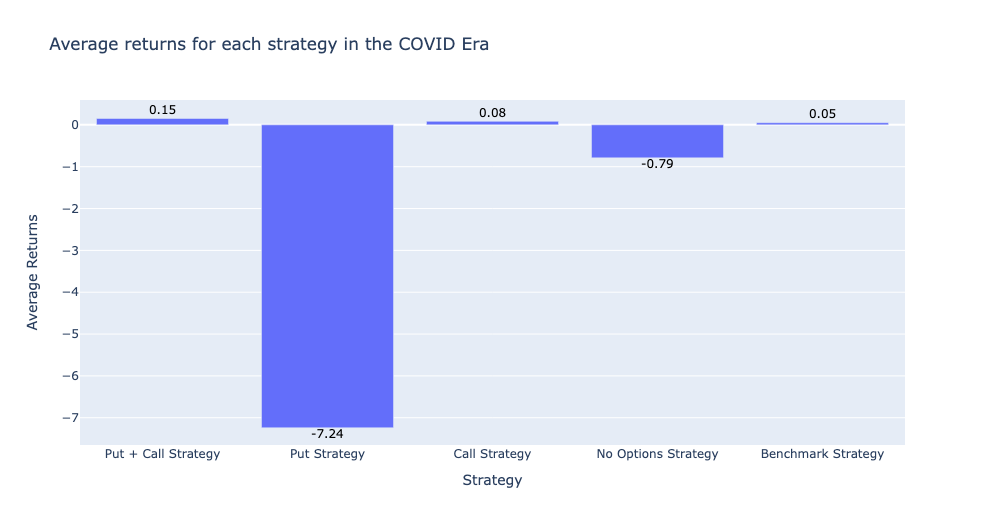

In [20]:
plot_covid_weights(tickers, monthly_df, daily_df, 60, 4, 3)

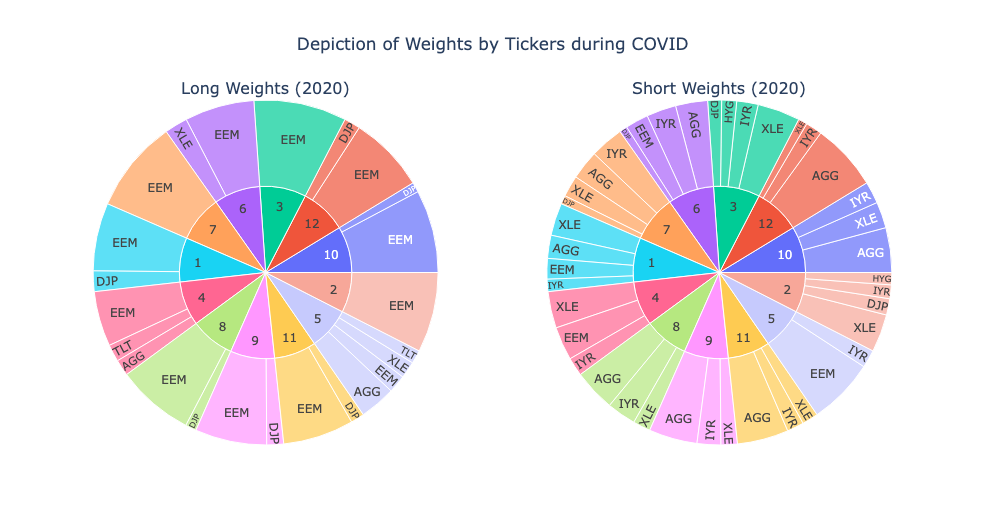

### Example to highlight the importance of Tail Risk Hedging during the pandemic

- At the start of April 2020, one of the positions we are going short on is the XLE ETF (largest weight for that month). At the end of the month, we aim to buy back the ETF


- In order to hedge against the risk of the ETF price rising (as we will be buying it back at the end of the month), in our Put+Call Strategy and the Call Strategy we buy a call option on the XLE ETF


- As seen in the dataframe below, the call is exercised the next day itself leading to an increase in Cash of $\$110$k in the Put+Call Strategy and the Call Strategy


- In the Put Strategy and the No Option Strategy, we simply maintain the position on this day


- At the end of the month, the price of XLE has risen from 24.5 to 33.7. Closing this position out would cost nearly $\$2$mm. Therefore, we incur a huge loss of ~600k in the Put Strategy and the No Option Strategy. Since we already exercised the call in the Put+Call Strategy and the Call Strategy, we instead profit by nearly $\$1.5$mm

In [21]:
example = pd.DataFrame(index=['2020-04-01', '2020-04-02', '2020-04-30'])
example['Put+Call Action'] = strat_results['Action']
example['Put+Call Cash'] = strat_results['Cash']

example['Put Action'] = strat_results_put['Action']
example['Put Cash'] = strat_results_put['Cash']

example['Call Action'] = strat_results_call['Action']
example['Call Cash'] = strat_results_call['Cash']

example['No Option Action'] = strat_results_no_options['Action']
example['No Option Cash'] = strat_results_no_options['Cash']

example

Put+Call Action  Put+Call Cash Put Action       Put Cash  \
2020-04-01            Open 7,809,276.8255       Open 1,380,146.9568   
2020-04-02  Call Exercised 7,919,355.0449   Maintain 1,380,146.9568   
2020-04-30           Close 9,443,237.2903      Close   783,325.5009   

               Call Action       Call Cash No Option Action No Option Cash  
2020-04-01            Open 15,866,391.2444             Open 9,437,261.3757  
2020-04-02  Call Exercised 15,976,469.4639         Maintain 9,437,261.3757  
2020-04-30           Close 17,500,351.7093            Close 8,840,439.9198

In [22]:
thetas_daily, top_n_daily, buy, sell = daily_pos_vectorized(tickers, monthly_df, daily_df, 60, 4, 3)

sell[(sell.index.isin(['2020-04-01', '2020-04-02', '2020-04-30'])) & (sell.Ticker == 'XLE')]

Ticker   Price  Theta^p          Volume            ADTV  Weights
Date                                                                       
2020-04-01    XLE 24.5070   0.0004 23,814,674.0000 81,245,057.0000   0.2063
2020-04-02    XLE 26.7519   0.0004 73,100,609.0000 81,245,057.0000   0.2063
2020-04-30    XLE 33.7171   0.0004 41,995,005.0000 69,733,536.5000   0.2063

## Comparison of performance between the 4 strategies defined above
### Return on Capital for window size = 60, n = 4, p= 3, capital = 10e6

### Return on Capital plots for strategy results with vs without funding and transaction costs using different tail-hedging metrics in momentum pair strategy

#### With funding and transaction costs:

In [23]:
performance_comparison_plots(strat_results, strat_results_put,strat_results_call, strat_results_no_options, \
                             strat_results_benchmark, 'Return on Capital')

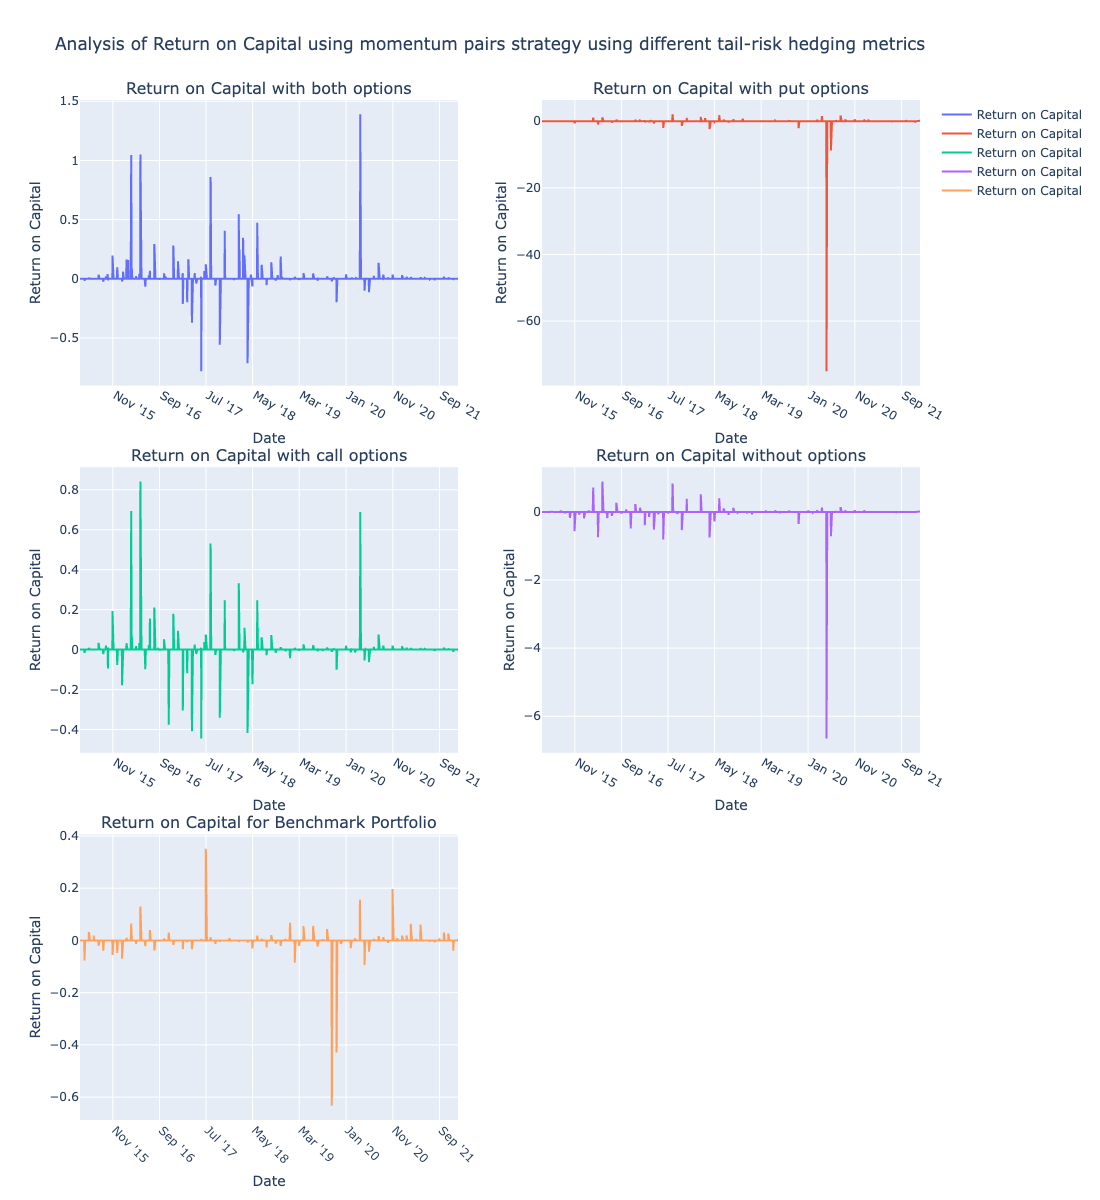

In [24]:
performance_comparison_plots(strat_results_without_funding, strat_results_put_without_funding,\
             strat_results_call_without_funding, strat_results_no_options_without_funding, \
                             strat_results_benchmark_without_funding, 'Return on Capital')

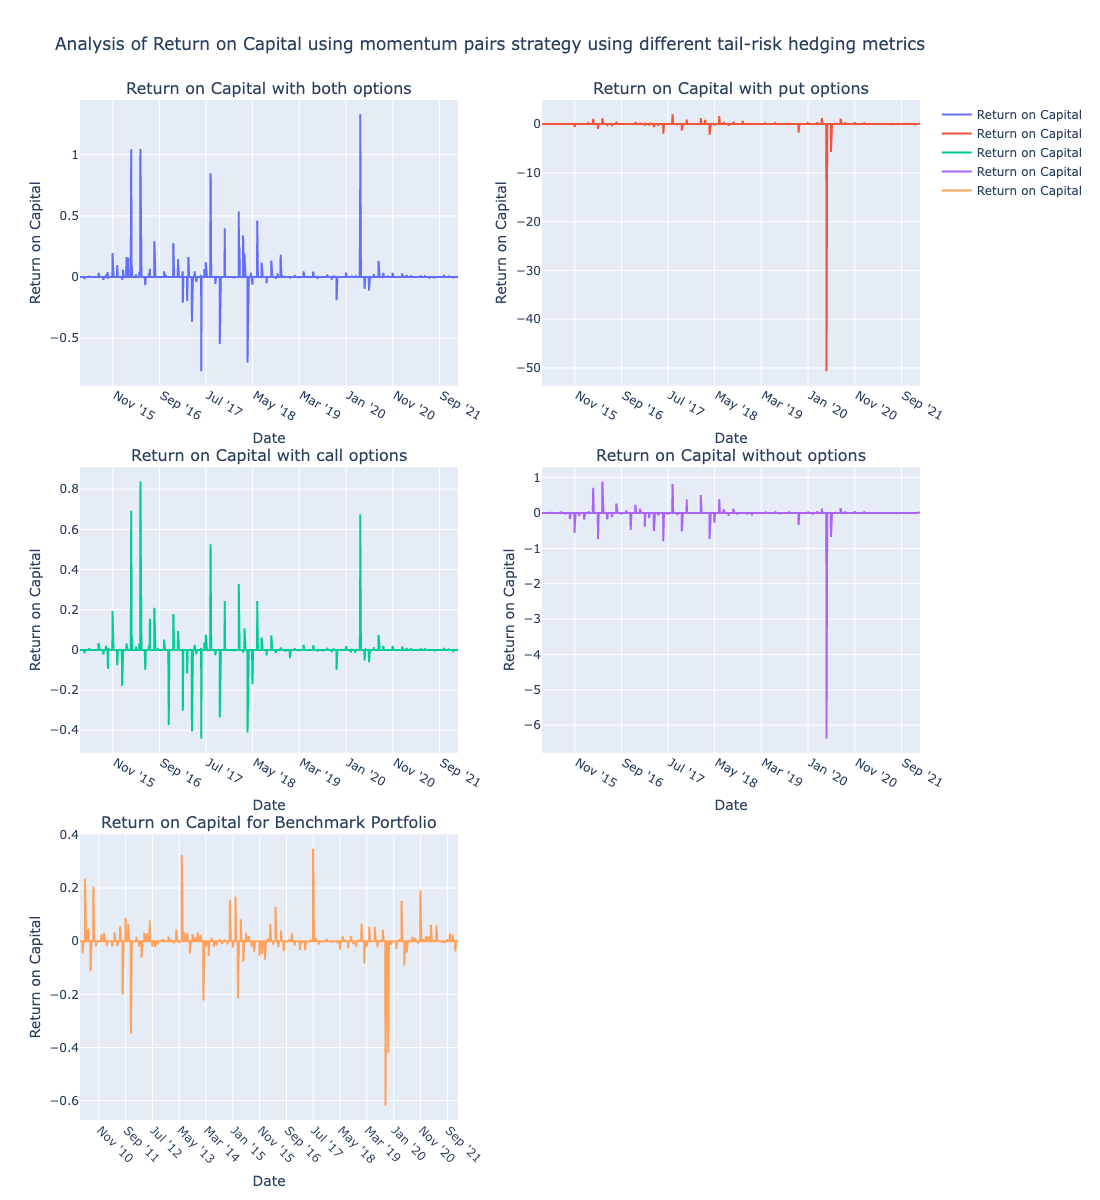

## Performance Summary for Return on Capital with funding and without funding

Note: These figures are not annualized

In [25]:
a = performance_summary(strat_results[['Return on Capital']][strat_results['Return on Capital']!=0], \
                        'Put + Call Strategy')
b = performance_summary(strat_results_put[['Return on Capital']][strat_results_put['Return on Capital']!=0], \
                        'Put Strategy')
c = performance_summary(strat_results_call[['Return on Capital']][strat_results_call['Return on Capital']!=0], \
                        'Call Strategy')
d = performance_summary(strat_results_no_options[['Return on Capital']][strat_results_no_options['Return on Capital']\
                                                                        !=0], 'No Option Strategy')
e = performance_summary(strat_results_benchmark[['Return on Capital']][strat_results_benchmark['Return on Capital']\
                                                                       !=0], 'Benchmark Portfolio')
pd.concat([a,b,c,d,e])

Mean  Volatility  Sharpe Ratio  Skewness  \
Put + Call Strategy  0.5828      0.8292        0.7028    2.1375   
Put Strategy        -8.3959     25.2911       -0.3320  -10.0815   
Call Strategy        0.2166      0.6108        0.3547    1.6437   
No Option Strategy  -1.3254      2.7384       -0.4840   -7.2219   
Benchmark Portfolio -0.0036      0.3529       -0.0102   -1.9325   

                     Excess Kurtosis  VaR (0.05)  CVaR (0.05) Max Drawdown  \
Put + Call Strategy          12.9608     -0.1340      -0.4333      -0.9039   
Put Strategy                103.4599     -1.2375     -15.2912     -75.0876   
Call Strategy                 8.3515     -0.2544      -0.3821      -0.8430   
No Option Strategy           60.2330     -0.7125      -1.9339      -1.0110   
Benchmark Portfolio          14.2746     -0.0935      -0.2823      -0.8220   

                          Peak     Bottom   Recovery  
Put + Call Strategy 2017-01-30 2017-09-29        NaT  
Put Strategy        2020-03-31 2020-04-30 2020-05-29  
Call Strategy       2016-09-30 2018-04-30        NaT  
No Option Strategy  2015-07-31 2020-04-30        NaT  
Benchmark Portfolio 2011-06-30 2020-01-31        NaT

In [26]:
a = performance_summary(strat_results_without_funding[['Return on Capital']]\
                        [strat_results_without_funding['Return on Capital']!=0], 'Put + Call Strategy')
b = performance_summary(strat_results_put_without_funding[['Return on Capital']]\
                        [strat_results_put_without_funding['Return on Capital']!=0], 'Put Strategy')
c = performance_summary(strat_results_call_without_funding[['Return on Capital']]\
                        [strat_results_call_without_funding['Return on Capital']!=0], 'Call Strategy')
d = performance_summary(strat_results_no_options_without_funding[['Return on Capital']]\
                        [strat_results_call_without_funding['Return on Capital']!=0], 'No Option Strategy')
e = performance_summary(strat_results_benchmark_without_funding[['Return on Capital']]\
                        [strat_results_benchmark_without_funding['Return on Capital']!=0], 'Benchmark Portfolio')
pd.concat([a,b,c,d,e])

Mean  Volatility  Sharpe Ratio  Skewness  \
Put + Call Strategy  0.5719      0.8124        0.7040    2.1002   
Put Strategy        -5.5684     17.1159       -0.3253  -10.0091   
Call Strategy        0.2143      0.6052        0.3542    1.6484   
No Option Strategy  -0.9505      2.2727       -0.4182   -8.3004   
Benchmark Portfolio -0.0028      0.3485       -0.0081   -1.8705   

                     Excess Kurtosis  VaR (0.05)  CVaR (0.05) Max Drawdown  \
Put + Call Strategy          12.6266     -0.1291      -0.4255      -0.8964   
Put Strategy                102.4776     -1.1973     -10.6025     -50.6903   
Call Strategy                 8.3955     -0.2531      -0.3786      -0.8389   
No Option Strategy           80.1140     -0.5479      -1.6490      -1.0124   
Benchmark Portfolio          13.8981     -0.0912      -0.2787      -0.8121   

                          Peak     Bottom   Recovery  
Put + Call Strategy 2017-01-30 2017-09-29        NaT  
Put Strategy        2020-03-31 2020-04-30 2020-05-29  
Call Strategy       2016-09-30 2018-04-30        NaT  
No Option Strategy  2015-07-31 2020-04-30        NaT  
Benchmark Portfolio 2011-06-30 2020-01-31        NaT

### Discussion
 
$\textbf{Return on Capital with funding}$: While comparing the performance summary metrics we observe that the maximum return is coming from the put strategy. However, this is misleading as the risk we are assuming in solely the put strategy is much higher than the risk in the other strategies, as evident from the respective volatilties. If we look at the graphs, the returns on the put options are mostly negative when used as the only tail risk hedging method in the momentum pair strategy. The Call strategy seems to be doing the best when we talk about the best hedge for tail-risk as seen from the minimum value of the returns (-0.4449). This could be coherent with the reasons that are highlighted below as the analysis of these returns in 2020. The best returns are seen when we use puts and calls together on our pairs relative to the Sharpe ratio of the returns (0.7028) with a maximum value of 1.3900. From the motivation of using tail-risk hedging in our strategy, we would like to see more returns when we use tail-risk hedging methods as compared to when we dont. This is what we are observing, our strategy seems to be performing better than when there was no hedge. Moreover, it exceeds the returns of the benchmark portfolio as well. 

$\textbf{Return on Capital without funding}$: Return on Capital without funding follows the same trend as it does with funding. However, in the case where we do not have funding, we observe lower level of returns in all cases. This is also the reason why the minimum value in the put strategy reaches -50.6903. Even in the call strategy and put + call strategy the returns drop from 0.8414 to 0.8381 and 1.3900 to 1.3297 respectively. There could be a couple of reasons why there are lower level of returns in the case where there is no funding. Some of them being:

- Limited Resources: Without funding, investors may have limited resources to deploy in the market. This could limit their ability to take advantage of opportunities and generate higher returns.

- Higher Cost of Capital: When investors have to finance investments with their own capital, they may demand a higher rate of return to compensate for the opportunity cost of not using that capital elsewhere. This could result in lower returns overall.

## Cumulative PnL for strategy results using different tail-hedging metrics in momentum pair strategy

In [27]:
performance_comparison_plots(strat_results, strat_results_put,strat_results_call, strat_results_no_options, \
                             strat_results_benchmark, 'Cumulative PnL', False)

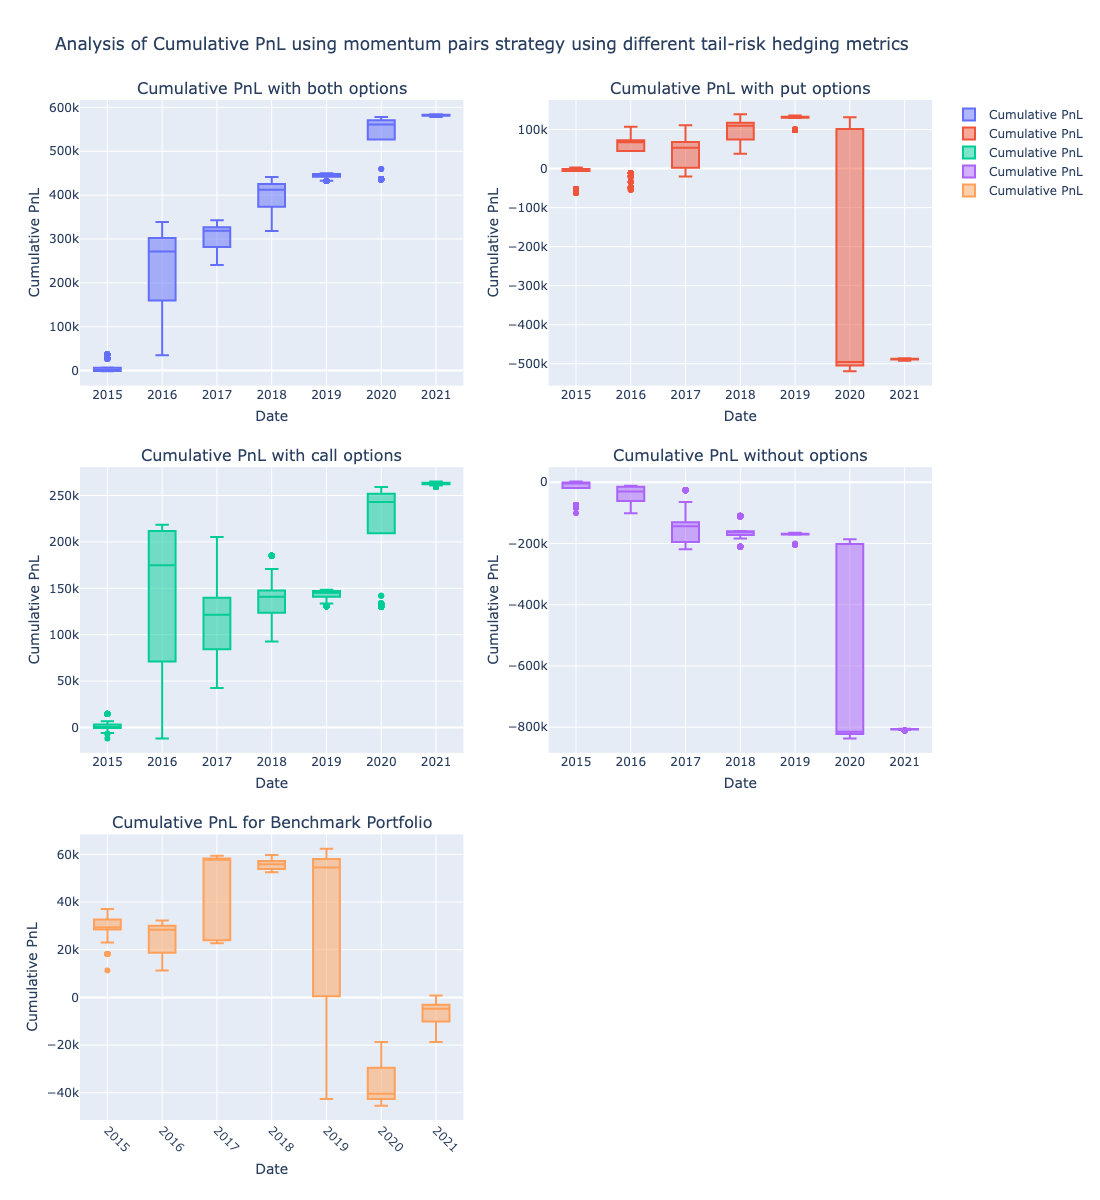

### Discussion
 
$\textbf{Cumulative PnL}$: To analyze the cumulative PnL, we plotted box plots of the same grouped by yearly data. In our boxplot with both options, there are outliers observed in 2015, 2018, 2019, 2020, and 2021. Since we hedged our risk well, we do not observed a loss in 2020 as we do with the other strategies that we analyze, that is, the highest cumulative PnL is observed in the strategy where we use both call and put options for hedging tail-risk. Our strategy that involves only call options does relatively well than the others in 2020. The worst losses were observed in the strategy where no risk was hedged at all, indicating the importance of risk management in investing. The analysis suggests that hedging with both call and put options was more effective in generating returns and mitigating risk than using only one type of option or no hedging at all.Overall, the comparison to the benchmark indicates that the hedging strategies were successful in generating higher cumulative PnL than the benchmark. This suggests that the strategies were effective in generating returns, even during periods of market volatility.

## Return on Capital by Action

In [28]:
ret_capital_trade(strat_results, strat_results_put, strat_results_call, strat_results_no_options, \
                  strat_results_benchmark)

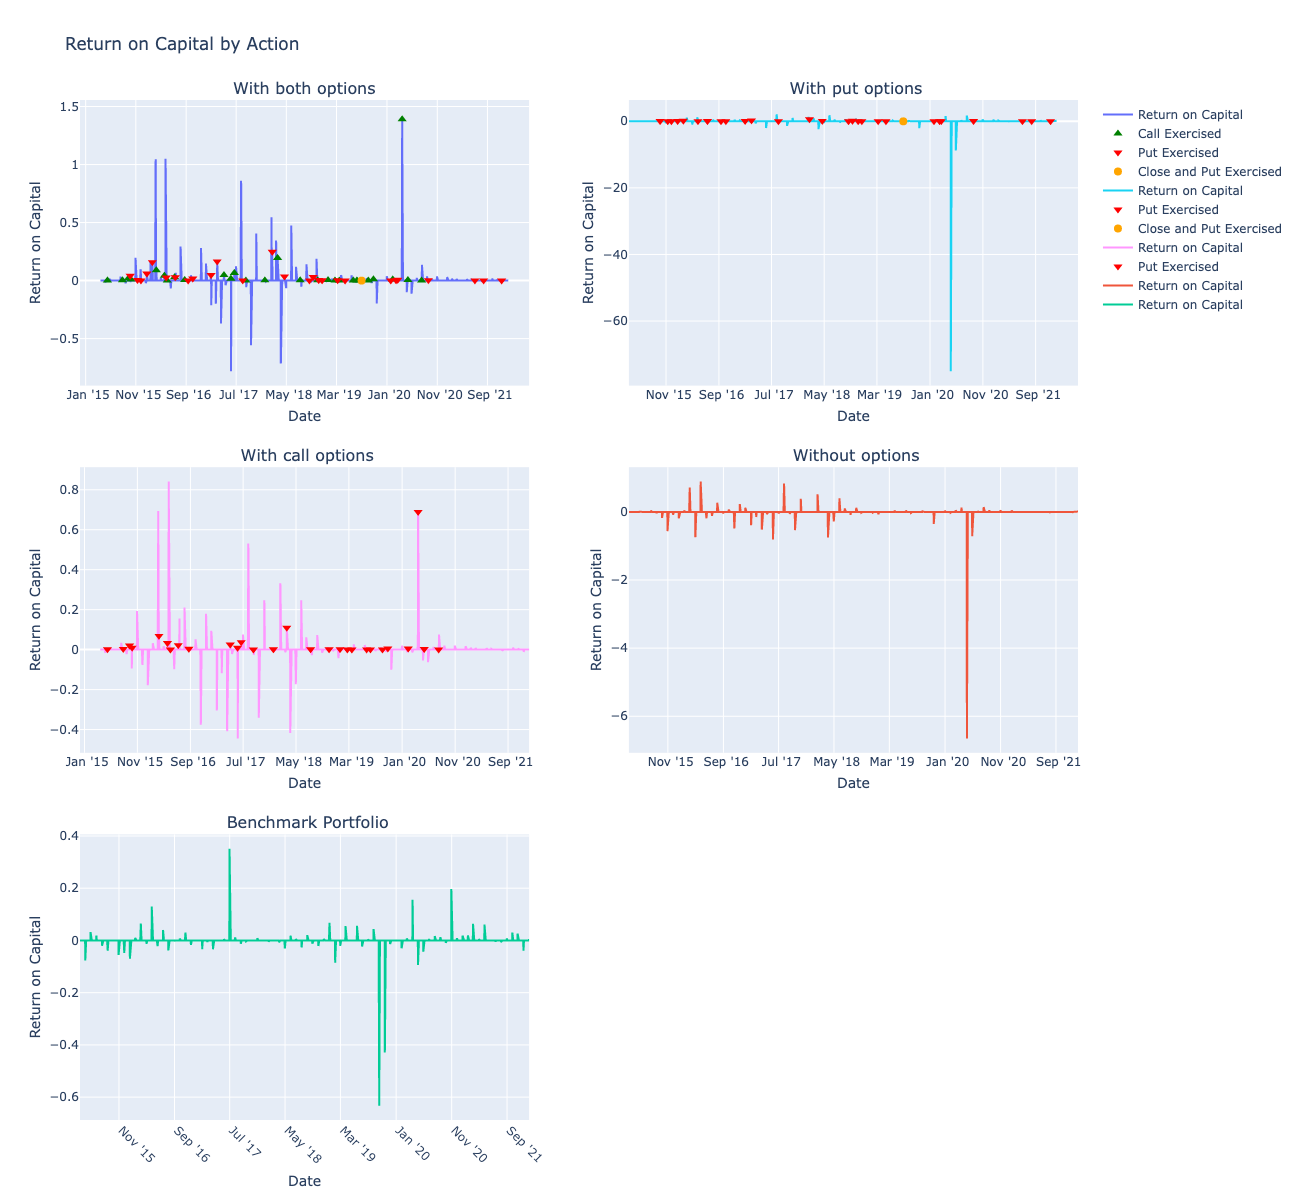

## Violin Plots for Returns

In [29]:
returns_df = pd.concat([strat_results['Return on Capital'], 
                        strat_results_call['Return on Capital'], 
                        strat_results_put['Return on Capital'], 
                        strat_results_no_options['Return on Capital'], 
                        strat_results_benchmark['Return on Capital']], 
                       axis=1, 
                       keys=['Returns', 'Returns_call', 'Returns_put', 'Returns_no_options', 'Returns_benchmark'])

In [30]:
violin_plot(returns_df, ['Returns', 'Returns_call', 'Returns_put', 'Returns_no_options', 'Returns_benchmark'])

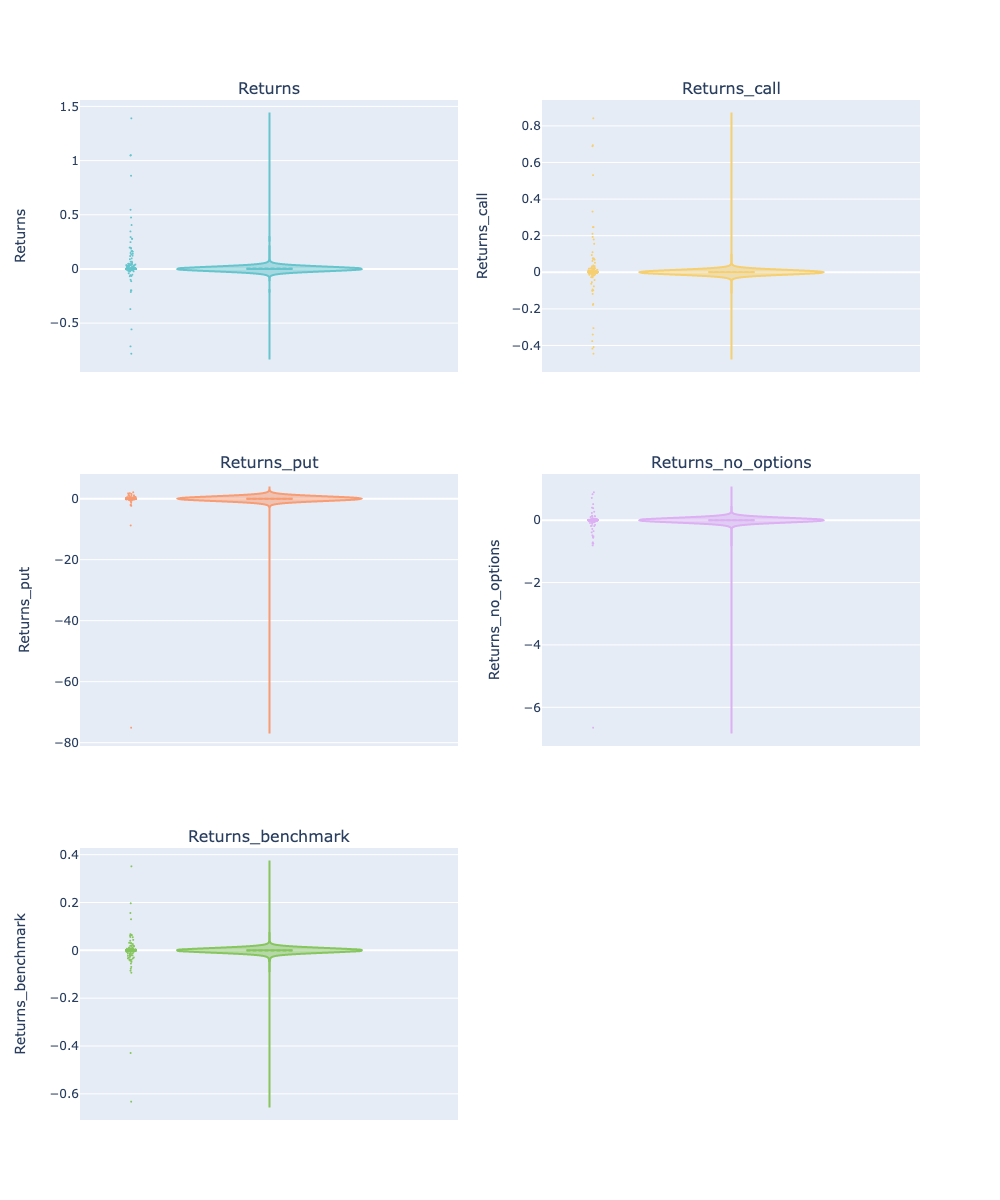

## Comparison of the Put+Call Strategy to Market Returns

- For the most part, SPY has higher returns than the Put+Call Strategy. However, when the market crashes (as seen during the COVID pandemic), the strategy has slightly positive returns (which is the point of our tail risk hedging strategy as it provides a form of insurance against downside risk)
- Due to the tail risk hedging aspect, the strategy is also less volatile as compared to SPY
- The Put+Call Strategy is also negatively correlated to the market, which adds to diversification rather than just holding market shares

In [31]:
plot_comp_spy(strat_returns, strat_returns_put, strat_returns_call, strat_returns_no_options, \
              strat_returns_benchmark, daily_df)

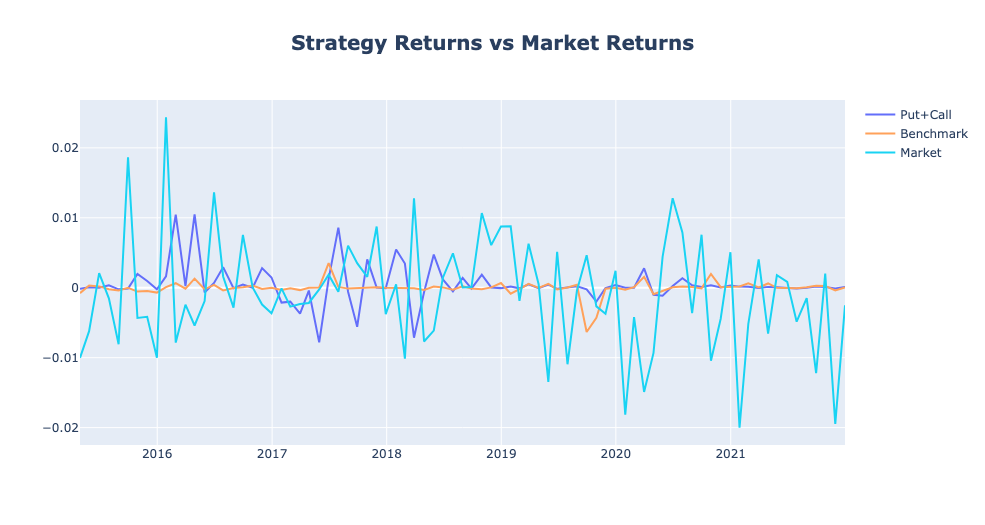

In [32]:
plot_corr_spy(strat_returns, strat_returns_put, strat_returns_call, strat_returns_no_options, \
              strat_returns_benchmark, daily_df)

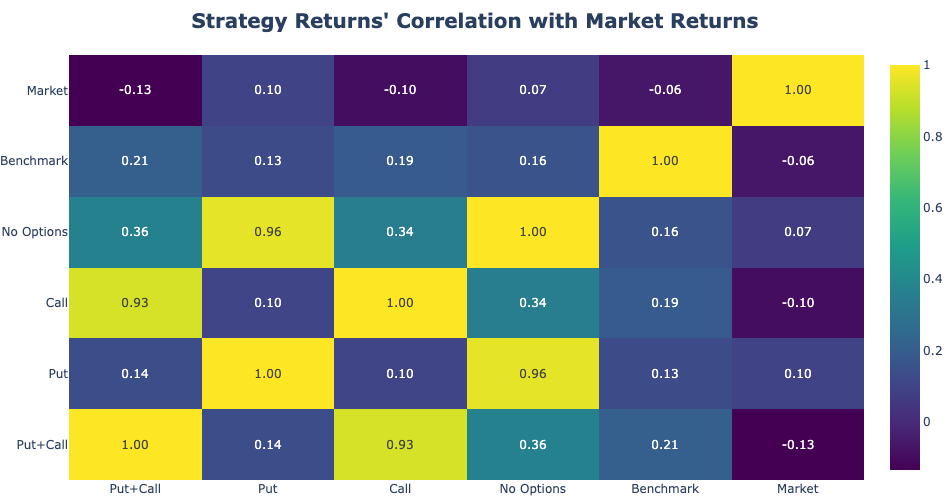

## Weight Distribution over the Strategy Timeframe

In [33]:
weight_distribution_buy(tickers, monthly_df, daily_df, 60, 4, 3)

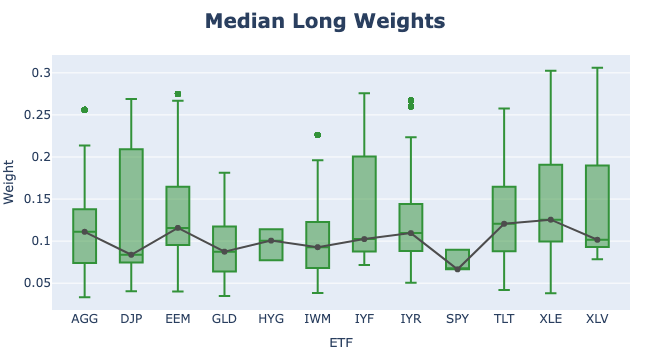

In [34]:
weight_distribution_sell(tickers, monthly_df, daily_df, 60, 4, 3)

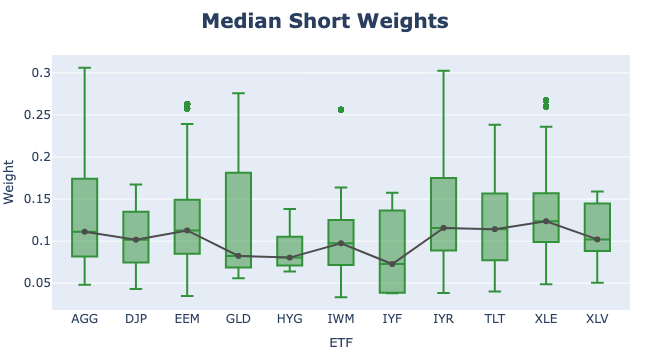

## Time Series Analysis 

### Testing the Stationarity of Time Series of Returns

#### To test the stability of our spreads data, we will observe if the the scores remain <u>stationary</u> over time, i.e. do the statistical properties of the timeseries remain same or stable over time. <br>

- Stationarity indicates independence in the each data point over the timeseries and thus providing statistical power as the behavior of the data remains constant.

### Quantitative Test <br>

- Although the visual test is a quick-and-dirty method to detect stationary, we can apply more quantitative methods that would test the stationarity with statistical significane. <br><br>

- We use the **Augmented Dicky-Fuller Test (ADF)** and **Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test**  to test for stationarity.

### Augmented Dickey-Fuller (ADF) Test 

In [35]:
adf_test(strat_results['Return on Capital'])

ADF Statistic  p-value  Critical Value (1%)  Critical Value (5%)  \
Return       -27.8370   0.0000              -3.4342              -2.8632   

        Critical Value (10%)  
Return               -2.5677

In [36]:
adf_test(strat_results_call['Return on Capital'])

ADF Statistic  p-value  Critical Value (1%)  Critical Value (5%)  \
Return       -41.2953   0.0000              -3.4342              -2.8632   

        Critical Value (10%)  
Return               -2.5677

In [37]:
adf_test(strat_results_put['Return on Capital'])

ADF Statistic  p-value  Critical Value (1%)  Critical Value (5%)  \
Return       -41.2431   0.0000              -3.4342              -2.8632   

        Critical Value (10%)  
Return               -2.5677

In [38]:
adf_test(strat_results_no_options['Return on Capital'])

ADF Statistic  p-value  Critical Value (1%)  Critical Value (5%)  \
Return       -41.2570   0.0000              -3.4342              -2.8632   

        Critical Value (10%)  
Return               -2.5677

In [39]:
adf_test(strat_results_benchmark['Return on Capital'])

ADF Statistic  p-value  Critical Value (1%)  Critical Value (5%)  \
Return       -10.3905   0.0000              -3.4326              -2.8625   

        Critical Value (10%)  
Return               -2.5673

### Observations:
- Null hypothesis: The null hypothesis of the ADF test is that the time series has a unit root and is non-stationary. The alternative hypothesis is that the time series is stationary. <br><br>
- Here we can see that the absolute value of the test statistic is greater than the critical values, thus we reject the null hypothesis in favor of the alternative hypothesis of stationarity.<br><br>

- Here we can see that the p-value is less than 0.05, thus we reject the null hypothesis of a unit root in favor of the alternative hypothesis of stationarity.<br><br>

- Thus in all the cases of different strategies, we can infer that from both t stat and p value, we reject null hypothesis and conclude time series is stationary.

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test 

In [40]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    display(kpss_test(strat_results['Return on Capital']))

KPSS Statistic  p-value  1% Crit. Val.  5% Crit. Val.  10% Crit. Val.
Return          0.1292   0.1000         0.7390         0.4630          0.3470

In [41]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    display(kpss_test(strat_results_call['Return on Capital']))

KPSS Statistic  p-value  1% Crit. Val.  5% Crit. Val.  10% Crit. Val.
Return          0.0733   0.1000         0.7390         0.4630          0.3470

In [42]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    display(kpss_test(strat_results_put['Return on Capital']))

KPSS Statistic  p-value  1% Crit. Val.  5% Crit. Val.  10% Crit. Val.
Return          0.1618   0.1000         0.7390         0.4630          0.3470

In [43]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    display(kpss_test(strat_results_no_options['Return on Capital']))

KPSS Statistic  p-value  1% Crit. Val.  5% Crit. Val.  10% Crit. Val.
Return          0.1048   0.1000         0.7390         0.4630          0.3470

In [44]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    display(kpss_test(strat_results_benchmark['Return on Capital']))

KPSS Statistic  p-value  1% Crit. Val.  5% Crit. Val.  10% Crit. Val.
Return          0.0917   0.1000         0.7390         0.4630          0.3470

### Observations:
- Null hypothesis: The null hypothesis of the KPSS test is that the time series is stationary. The alternative hypothesis is that the time series has a unit root and is non-stationary. <br><br>
- Here we can see that the absolute value of the test statistic is less than the critical values, thus we fail to reject the null hypothesis.<br><br>

- Here we can see that the p-value is greater than 0.05, thus we fail to reject the null hypothesis.<br><br>

- Thus in all the cases of different strategies, we can infer that from both t stat and p value, we fail to reject null hypothesis and conclude time series is  stationary. <br><br>

- Thus both the ADF and KPSS test conclude that time series is stationary.

### Testing the Normality of Returns

### Kolmogorov–Smirnov (KS) Test

In [45]:
ks_test(strat_results['Return on Capital'])

KS Statistic  p-value
Return        0.4652   0.0010

In [46]:
ks_test(strat_results_call['Return on Capital'])

KS Statistic  p-value
Return        0.4694   0.0010

In [47]:
ks_test(strat_results_put['Return on Capital'])

KS Statistic  p-value
Return        0.4871   0.0010

In [48]:
ks_test(strat_results_no_options['Return on Capital'])

KS Statistic  p-value
Return        0.4872   0.0010

In [49]:
ks_test(strat_results_benchmark['Return on Capital'])

KS Statistic  p-value
Return        0.4773   0.0010

### Observations:
- Null hypothesis: The null hypothesis of the KS test for normality is that the sample is drawn from a normally distributed population. The alternative hypothesis is that the sample is not drawn from a normally distributed population. <br><br>
- Here we can see that for all the cases of different strategies the p-value is less than the 0.05, thus we reject the null hypothesis of normality and conclude that the sample is not drawn from a normally distributed population.

In [50]:
strat_results_benchmark = strat_results_benchmark.loc['2015-04-01':]

## Q-Q Plots

In [51]:
qq_plot(returns_df, ['Returns', 'Returns_call', 'Returns_put', 'Returns_no_options', 'Returns_benchmark'])

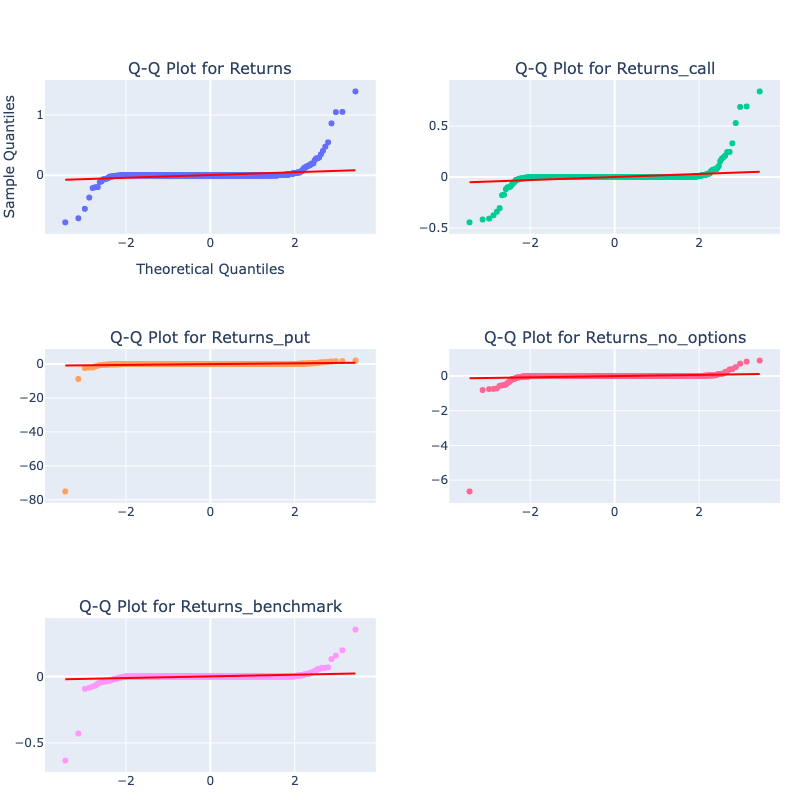

### Observations:
- The basic idea is to compare the quantiles of the observed data with those of the theoretical distribution, typically the normal distribution.<br><br>
- If the data is normally distributed, the points on the Q-Q plot will follow a straight line.<br><br>
- Here we see that in case of all the different strategies, the points on the Q-Q plot deviate from a straight line, it indicates that the data is not normally distributed <br><br>
- Thus both KS test and Q-Q plot test gives us that it is not normally distributed. <br><br>
- Also we could infer that maximum negative return is obtained in the case of strategy with only put options(-75%) followed by strategy with no options (-6.6%) and rest are almost in line with each other.

### Testing the Autocorrelation and Partial Autocorrelation

### ACF Plots 

In [52]:
acf_plot(returns_df, ['Returns', 'Returns_call', 'Returns_put', 'Returns_no_options', 'Returns_benchmark'])

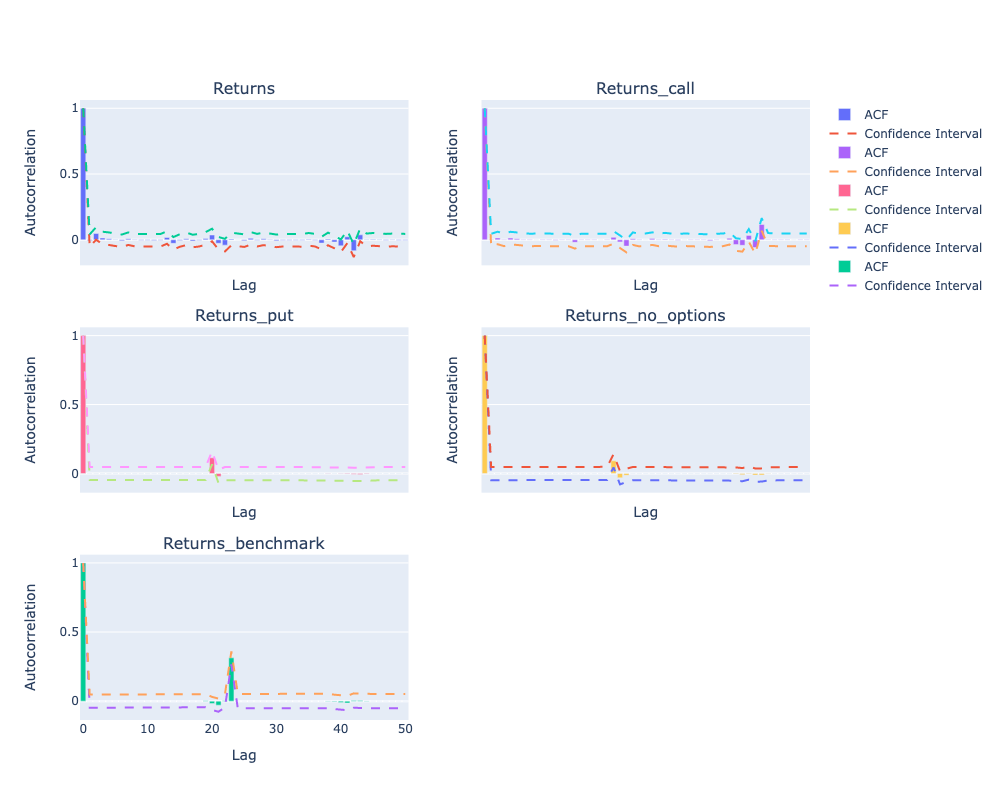

### PACF Plots 

In [53]:
pacf_plot(returns_df, ['Returns', 'Returns_call', 'Returns_put', 'Returns_no_options', 'Returns_benchmark'])

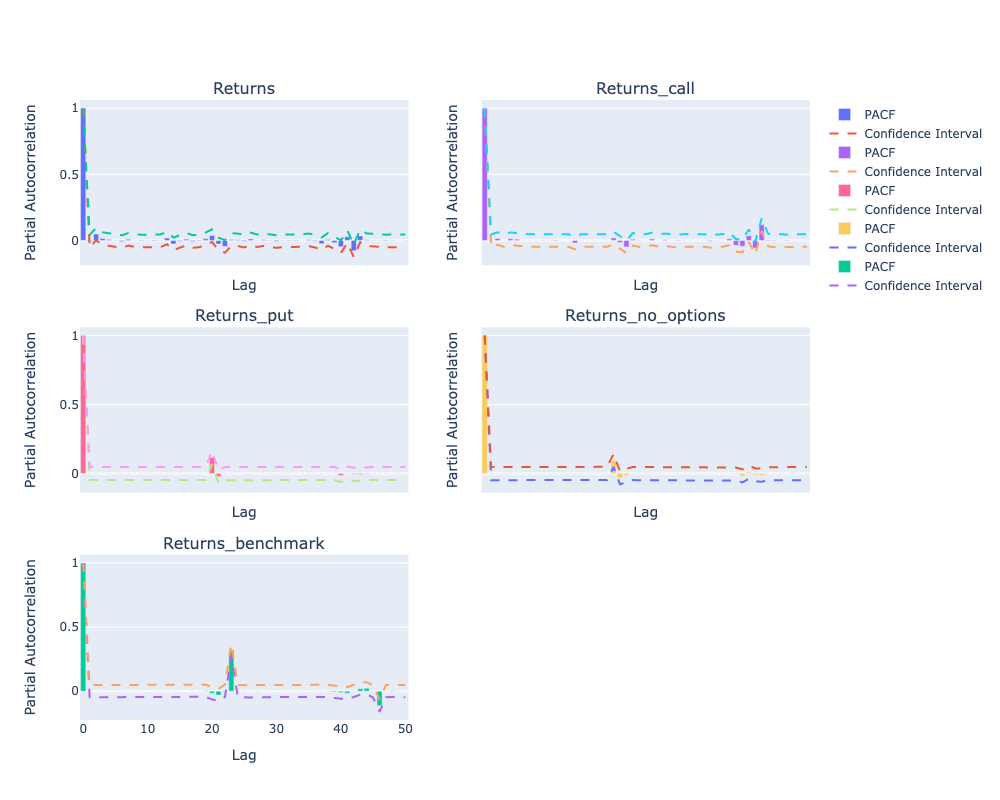

### Observations:
- We can infer that in case of all the different strategies, we have small moderate positive autocorrelation. This suggests that there is a moderate positive correlation between the time series and its past lags at these specific lag values. However, the correlation is not particularly strong, as the values are relatively low.

### Plotting Histograms 

In [54]:
returns_df_1 = pd.concat([strat_returns['Return on Capital'], 
                        strat_returns_call['Return on Capital'], 
                        strat_returns_put['Return on Capital'], 
                        strat_returns_no_options['Return on Capital'], 
                        strat_returns_benchmark['Return on Capital']], 
                       axis=1, 
                       keys=['Returns', 'Returns_call', 'Returns_put', 'Returns_no_options', 'Returns_benchmark'])

In [55]:
hist_plot(returns_df_1, ['Returns', 'Returns_call', 'Returns_put', 'Returns_no_options', 'Returns_benchmark'])

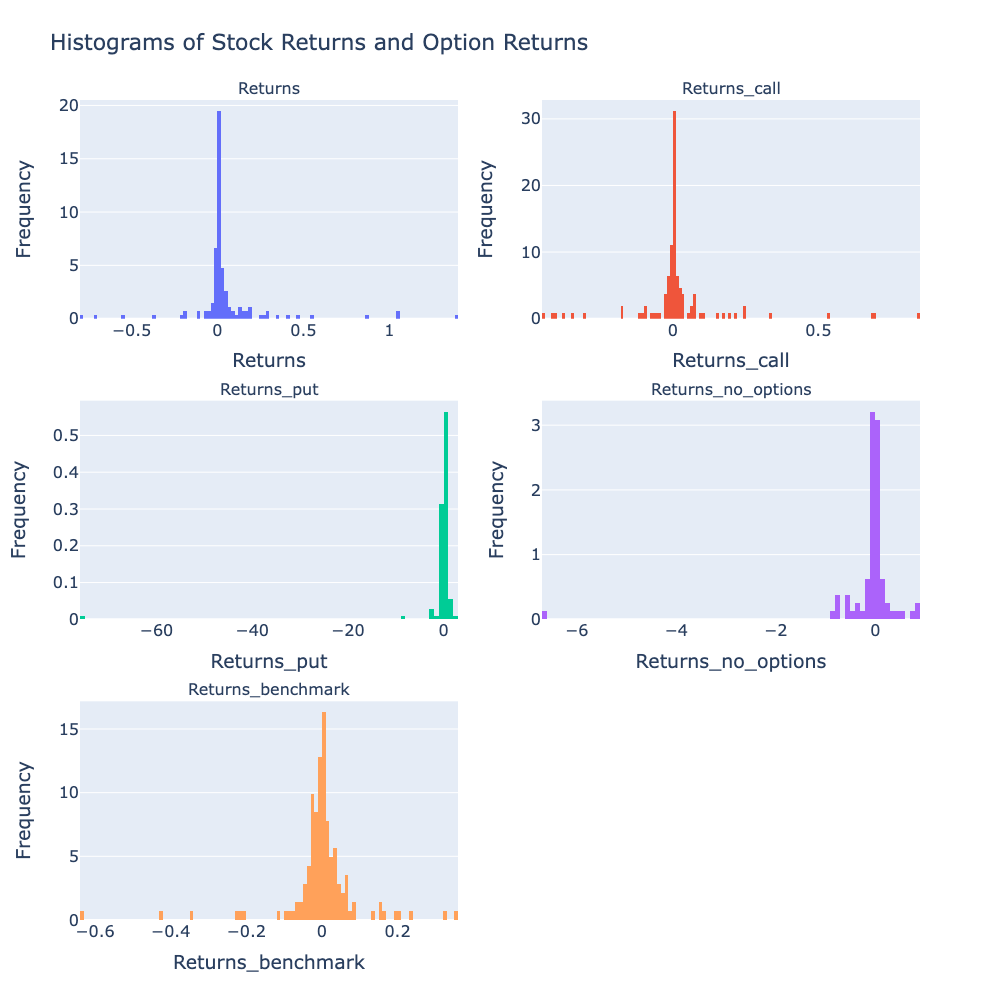

### Observation:
- We could see that historgram from all the 4 different strategies are mostly around zero and do not have heavy tails and not very much skewed on either side.

## Pros and Cons of the Long-Short Pairs Strategy without Options

Pros:
- Potential for higher returns: The paper provides empirical evidence that long-short pair strategies based on the proposed theory can outperform conventional rank-based approaches, leading to higher returns for investors.


- Improved risk management: Long-short pair strategies can potentially provide better risk management compared to other investment strategies because they are designed to be market-neutral, meaning that they are less exposed to overall market movements.


- Flexibility: The proposed theory is agnostic to signal type, meaning that it can be applied to any signal, allowing for a flexible approach to investing.

Cons:
- Complexity: Long-short pair strategies can be more complex than other investment strategies, requiring a deeper understanding of the underlying asset relationships and correlations.


- Transaction costs: Because long-short pair strategies involve buying and selling multiple assets, transaction costs can be higher compared to other investment strategies.


- Limited liquidity: Depending on the asset class, some long-short pair strategies may be limited by liquidity constraints, making it difficult to implement the strategy effectively.

## Pros and Cons of the Long-Short Pairs Strategy with Put and Call Options

Pros:
- Reduces downside risk: Tail risk hedging using put and call options can help to reduce the downside risk of the long-short pair strategy proposed in the paper. By purchasing put options on the long positions and call options on the short positions, investors can protect against losses if the prices of those assets move in an unfavorable direction.


- Provides cost-effective protection: Compared to other tail risk hedging strategies such as buying out-of-the-money put options or shorting the market, using put and call options is often more cost-effective. This is because the cost of the options can be offset by the returns generated from the long-short pair strategy.


- Maintains exposure to the long-short pair strategy: Using put and call options to hedge tail risk allows investors to maintain their exposure to the long-short pair strategy while reducing the potential downside risk. This can be particularly beneficial in markets where volatility is high and sudden movements in asset prices can lead to large losses.

Cons:
- Increases complexity: Adding tail risk hedging to the long-short pair strategy can increase the complexity of the overall investment approach. This can make it more difficult to understand and implement effectively.


- Adds transaction costs: Purchasing put and call options can add transaction costs to the overall investment approach, which can reduce the returns generated from the long-short pair strategy.


- Can reduce returns: While tail risk hedging using put and call options can help to reduce downside risk, it can also reduce returns if the options expire unexercised or if the cost of the options is higher than the returns generated from the long-short pair strategy.

## Economic Intuition

### Event Analysis
Some of the major events in the world impacted the above strategies over the years and our back-testing also shows similar trends as observed by the financial events around the world.


### 2016: Brexit
<div>
    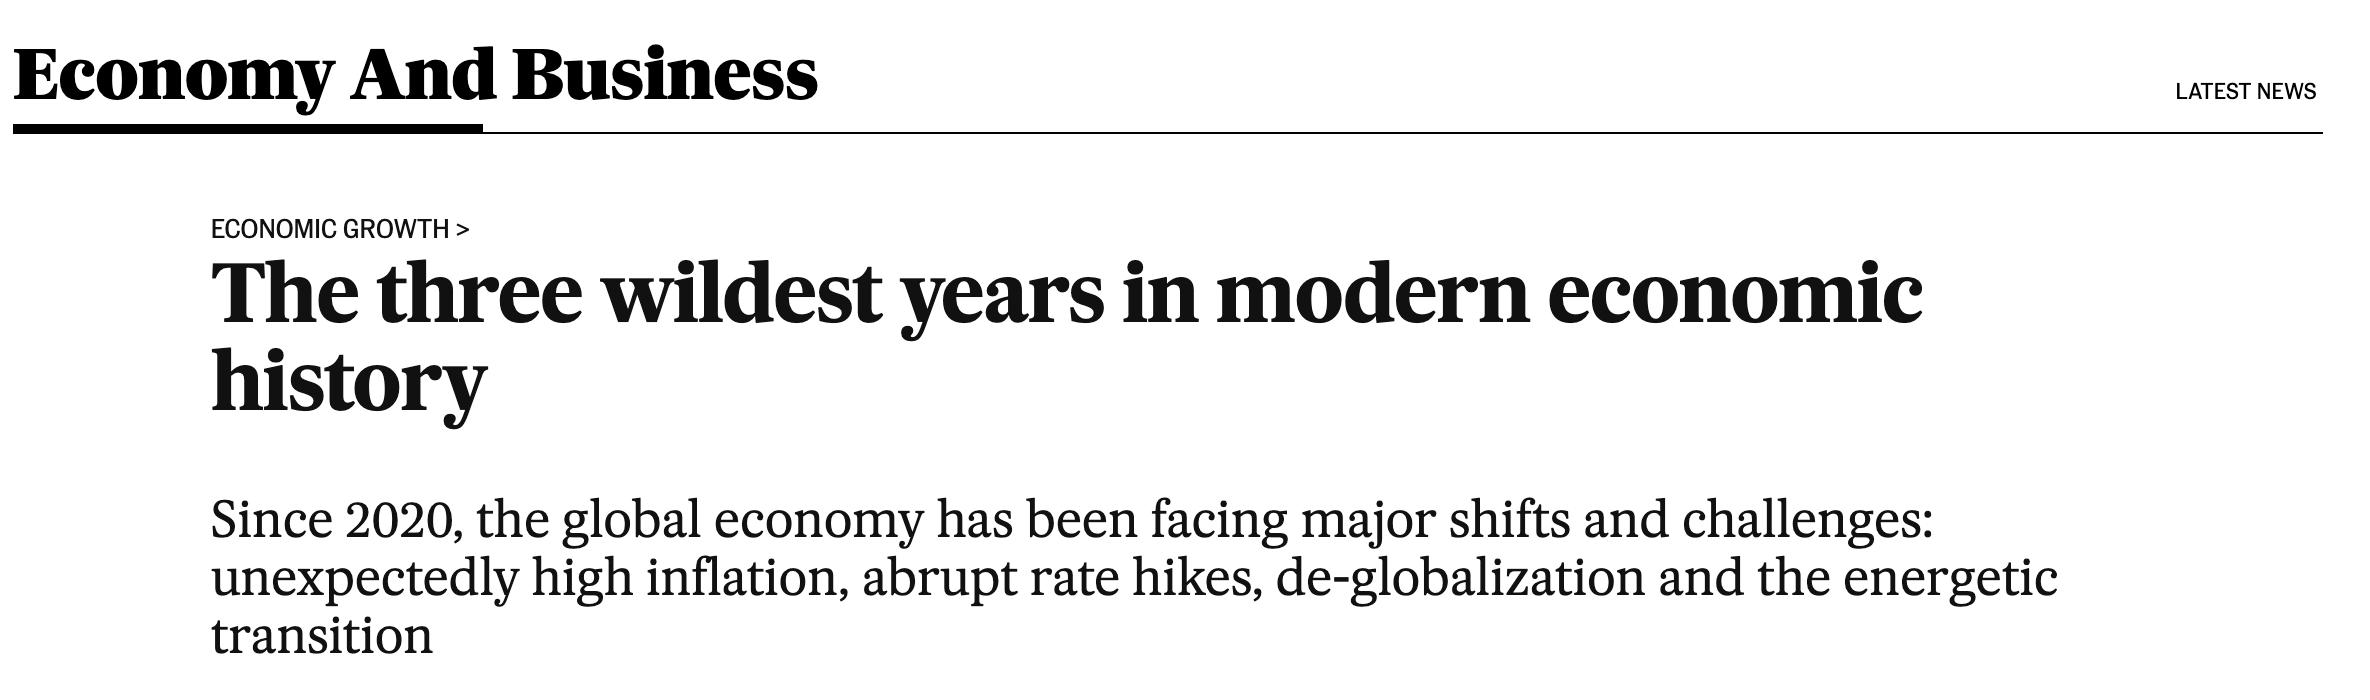
</div>

### 2020: COVID

<div>
    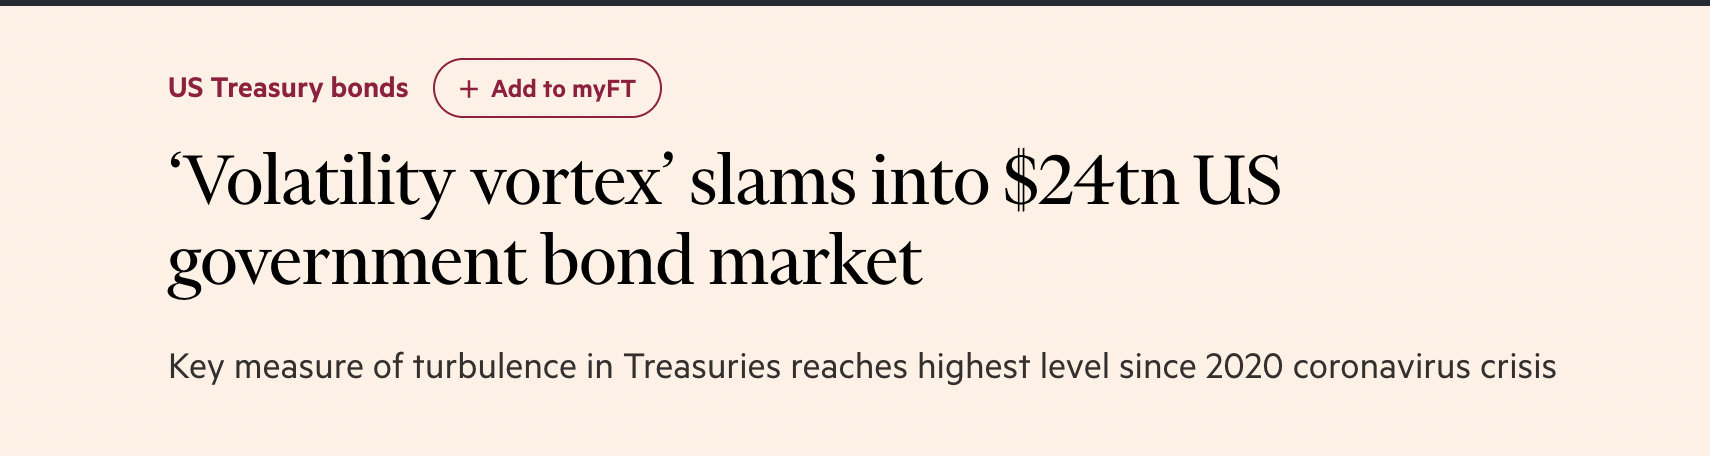
</div>

<div>
    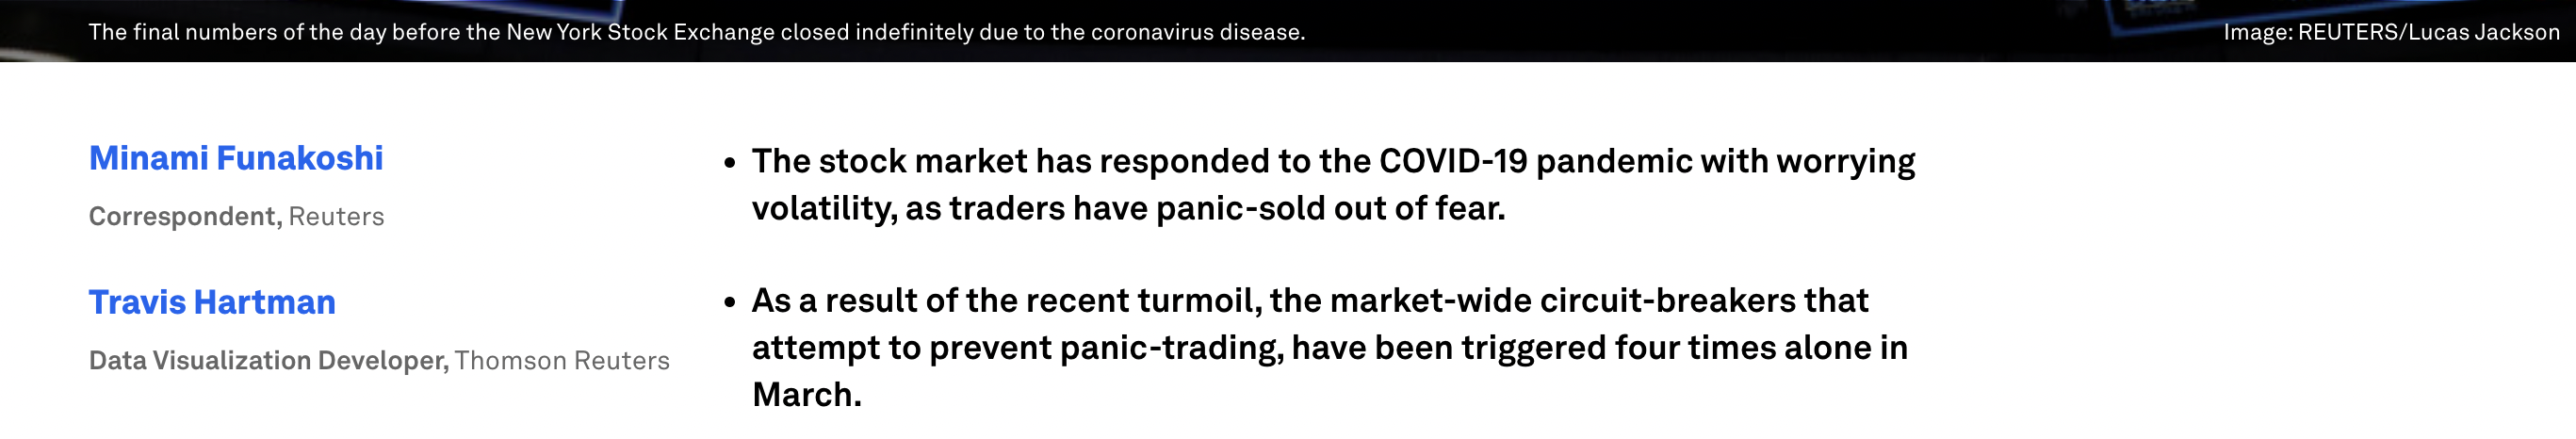
</div>

<div>
    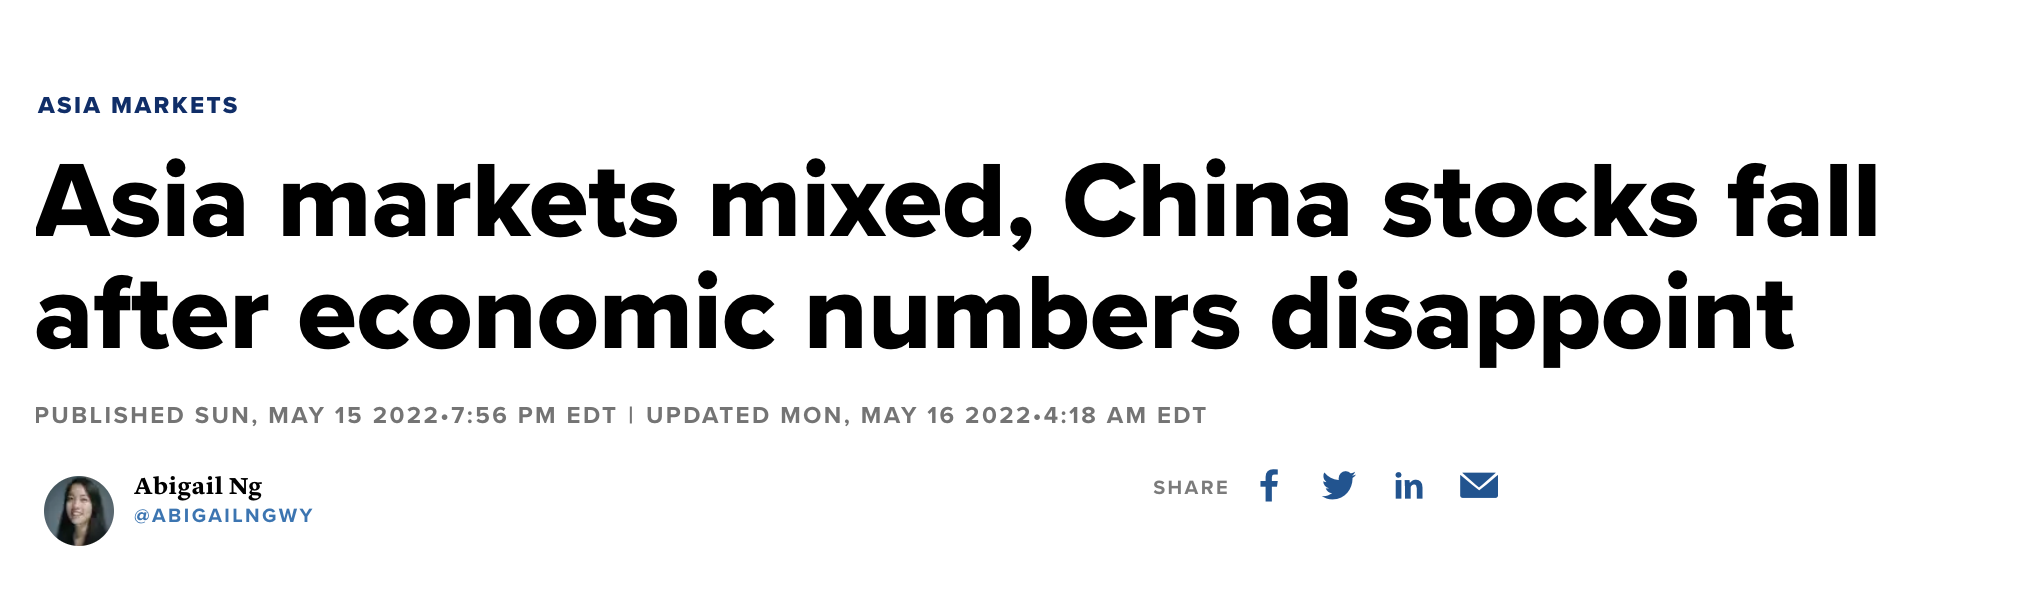
</div>

The COVID-19 pandemic has had a significant impact on financial markets and investment strategies, including momentum investing. During the early stages of the pandemic, the stock market experienced significant volatility and many momentum investors suffered losses as a result. This was because the pandemic caused sudden and significant changes in market conditions, which led to a disruption of established trends and patterns. In addition, many momentum investors may have been caught off guard by the sudden downturn, as they were not expecting such a rapid and dramatic shift in market conditions. 
The COVID-19 pandemic has had a significant impact on financial markets and asset relationships, which in turn affects the pairwise trading strategy. Some possible impacts of the pandemic on the pairwise trading strategy include:
1. Increased volatility: The pandemic has caused significant volatility in financial markets, which can make it more difficult to identify correlated assets and to predict their future movements.
2. Changes in asset correlations: The pandemic has also caused changes in asset correlations as market conditions and economic outlooks have shifted. This can make it more difficult to identify correlated assets that will remain stable over time.
3. Liquidity issues: The pandemic has caused liquidity issues in some markets, which can make it more difficult to execute trades and to exit positions when necessary.
4. Changes in demand for certain assets: The pandemic has caused changes in the demand for certain assets, as investors have sought safe-haven assets or assets that are seen as benefiting from the pandemic. This can affect the prices of assets and their relationships with other assets.


Since out strategy has tail-risk hedging with the options we are able to alleviate the negative impacts of the increased market volatility. Our strategy with a Sharpe Ratio of 3.69 gives us the highest annualized returns of 15.2% whereas the Benchmark Strategy only provides ~5% of annualized returns

### Times when the Strategy can Underperform
1. Market shocks and unexpected events: Long-short pair strategies can be vulnerable to market shocks and unexpected events, which can disrupt the underlying asset relationships and correlations that the strategy relies on. For example, a sudden change in interest rates or political events could cause unexpected changes in asset prices and correlations, potentially leading to losses for the strategy.


2. The underlying assumptions of the theory may not hold: The proposed theory relies on several assumptions, such as the existence of high own-asset signal-return predictability, low cross-asset signal correlation, and low cross-asset signal-return predictability. If these assumptions do not hold for a particular asset class or signal, then the strategy may not perform as expected.

### Ways to handle the Cons of the Strategy
1. Diversify the portfolio: To reduce the impact of market shocks and unexpected events, it is important to diversify the portfolio by including a range of different asset classes and signals. This can help to reduce the overall risk of the portfolio and make it more resilient to unexpected events.


2. Avoid overfitting: To avoid overfitting, investors should use a large sample size to construct the long-short pairs and avoid using too many parameters in the construction process. It is also important to use out-of-sample testing to verify the robustness of the results and avoid over-optimizing the strategy based on historical data.

## Future Improvements

There are several potential ways to improve the long-short pair strategy and tail risk hedging approach:

- Consider additional signal types: The strategy proposed in the paper focuses on momentum signals for major asset classes, but investors can consider adding other signal types such as value, carry, or quality. By using a diversified set of signals, investors can potentially improve the performance and reduce the risk of the portfolio.


- Optimize the pair selection process: The long-short pair strategy involves selecting pairs of assets with desirable signal-return properties. Investors can use machine learning algorithms and statistical methods to optimize the pair selection process and improve the overall performance of the portfolio.


- Explore additional hedging strategies: While tail risk hedging using put and call options can be effective, investors can consider other hedging strategies such as using futures, swaps, or other derivative instruments. These strategies can provide additional protection against downside risk and may be more cost-effective or easier to implement than using options.


- Regularly monitor and adjust the strategies: The performance of the long-short pair strategy and tail risk hedging approach can change over time, so it's important to regularly monitor and adjust the strategies as needed. Investors can use data analysis and visualization tools to monitor the performance of the portfolio and identify potential areas for improvement.


- Consider alternative investment approaches: The long-short pair strategy and tail risk hedging approach may not be suitable for all investors or market conditions. Investors can consider alternative investment approaches such as passive indexing, active management, or alternative investments such as real estate or private equity.

## Conclusion

In conclusion, the long-short pairs strategy proposed in this project offers a bottom-up approach to systematic investing that focuses on the relative bets informed by the structure of signal-return dependencies. This strategy can potentially generate high returns by exploiting price movements between assets, but it comes with some potential drawbacks such as complexity, transaction costs, and limited liquidity.


To address these cons, investors can consider tail risk hedging using put and call options to reduce downside risk while still maintaining exposure to the long-short pairs strategy. Tail risk hedging can help to protect against extreme events that can lead to large losses and reduce the impact of tail risks on portfolio returns. However, it also adds complexity and transaction costs to the investment approach and requires careful consideration of the potential risks and benefits involved.


By using a systematic approach and regularly monitoring and adjusting the strategies, investors can potentially generate high returns while managing the associated risks and costs.

## References

$^{[1]}$ Goulding, Christian L. and Harvey, Campbell R. and Pickard, Alex, Decoding Systematic Relative Investing: A Pairs Approach (December 10, 2020). Available at SSRN: https://ssrn.com/abstract=3680314 or http://dx.doi.org/10.2139/ssrn.3680314

$^{[2]}$ A Comparison of Tail Risk Protection Strategies in the U.S. Market - Caia. https://caia.org/sites/default/files/2013-aiar-q1-comparison.pdf. 

$^{[3]}$ “Morningstar REIT Yield Focus Index Family Rulebook: Morningstar Indexes.” Morningstar REIT Yield Focus Index Family Rulebook | Morningstar Indexes, https://indexes.morningstar.com/docs/rulebook/morningstar-singapore-reit-yield-focus-FS0000DE5E. 